# Machine Learning - assginment 2 
### created by - Hanna Bawardi , Aseel Atrash 

## intrudction

Firstly, me and my partner are going to learn  and analyze the data,Next  we  are going to provide machine learning models in order to  predict unit sales and rainy days.

##### introduction about the data
we have been provided with sales data for 111 products whose sales may be affected by the weather.These 111 products are sold in stores at 45 different Walmart locations. Some of the products may be a similar item (such as milk) but have a different id in different stores/regions/suppliers. The 45 locations are covered by 20 weather stations.

# Table of Contents

### 1 [Libraries](#section1)

### 2 [Section A: Data Exploration and Visualization](#section2)

### 3 [Section B: Data Pre-processing](#section3)

### 4 [Section C : Units Sales Prediction](#section4)

### 5 [Section D : rainy day prediction](#section5)

### 6 [Section F : Clustering - bonus](#section6)

# Libraries <a class="anchor" id="section1"></a>


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import KNNImputer
import datetime
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

RSEED = 10


# Section A :  Data Exploration and Visualization <a class="anchor" id="section2"></a>

in this section we are going to explore our data and it's values in order to know how to handle our data in the pre-processing section.

now we are going to provide a short explaination about our data


#### sales.csv - sales data for all stores and dates in the training set. It has four columns

item_nbr = an id representing one of the 111 products

store_nbr = an id representing one of the 45 stores

date = the day of sales

units = the quantity sold of an item on a given day

#### key.csv - relational mapping between stores and the weather stations that cover them. It has two columns

station_nbr = an id representing one of 20 weather stations

store_nbr = an id representing one of the 45 stores

#### weather.csv - a file containing the weather information for each station and day. It has 20 columns

station_nbr = an id representing one of 20 weather stations

date = the day of weather

tmax = maximum temperature on a particular day measured in Fahrenheit

tmin = minimum temperature on a particular day measured in Fahrenheit

tavg = average temperature on a particular day measured in Fahrenheit

depart = departure from normal temperature on a particular day measured in Fahrenheit

dewpoint = average dewpoint temperature on a particular day measured in Fahrenheit

wetbulb = average wetbulb temperature on a particular day measured in Fahrenheit

heat = heating degree day on a particular day with base as 65 degrees Fahrenheit. A heating degree day is a
measurement designed to quantify the demand for energy needed to heat a building

cool = cooling degree day on a particular day with base as 65 degrees Fahrenheit. A cooling degree day is a measurement designed to quantify the demand for energy needed to cool buildings

sunrise = The time of sunrise

sunset = The time of sunset

codesum = codes for different weather types

snowfall = the quantity of snow falling on a particular day measured in inches

preciptotal = the quantity of precipitation on a particular day measured in inches

stnpressure = average station pressure measured in hg

sealevel = average sealevel pressure measured in hg

resultspeed = resultant wind speed in miles per hour

resultdir = resultant wind direction

avgspeed = average speed of the wind


#### my variables:

weatherSC - tells us if the weather is extermlly bad or medium or moderate

holiday - if there a holiday in a givven day

rained : if there rain in a given day

weekend:if a day is a weekend or not

week: number of week 

Probability_for_rain: a grade for each day in specific month , the higher the grade the higher the propability to rain



### first of all let's import the datasets

In [2]:
weather = pd.read_csv('weather.csv',na_values=['M','-','*'] ,parse_dates=['date'])
sales = pd.read_csv('sales.csv', parse_dates=['date'])
key = pd.read_csv('key.csv')

### let's explore our datasets

In [3]:
weather.tail()

station_nbr       date  tmax  tmin  tavg  depart  dewpoint  wetbulb  \
20512           16 2014-10-31  53.0  34.0  44.0     NaN      35.0     41.0   
20513           17 2014-10-31  59.0  34.0  47.0     NaN      32.0     41.0   
20514           18 2014-10-31  67.0  49.0  58.0    -4.0      40.0     50.0   
20515           19 2014-10-31  45.0  33.0  39.0    -6.0      24.0     32.0   
20516           20 2014-10-31  68.0  50.0  59.0     NaN      39.0     50.0   

       heat  cool  sunrise  sunset codesum snowfall preciptotal  stnpressure  \
20512  21.0   0.0      NaN     NaN              NaN        0.00        29.90   
20513  18.0   0.0      NaN     NaN      RA      0.0        0.00        29.72   
20514   7.0   0.0    644.0  1738.0              0.0        0.00        29.78   
20515  26.0   0.0    624.0  1646.0   RA SN      0.1        0.02        29.51   
20516   6.0   0.0      NaN     NaN              0.0        0.00        29.57   

       sealevel  resultspeed  resultdir  avgspeed  
20512     29.99          4.5        3.0       5.3  
20513     30.39          9.2        1.0       9.3  
20514     30.28         10.6       36.0      11.2  
20515     30.24         20.4       34.0      20.9  
20516     30.27         10.5       36.0      11.2

In [4]:
sales.head()

date  store_nbr  item_nbr  units
0 2012-01-01          1         1      0
1 2012-01-01          1         2      0
2 2012-01-01          1         3      0
3 2012-01-01          1         4      0
4 2012-01-01          1         5      0

In [5]:
key.head()

store_nbr  station_nbr
0          1            1
1          2           14
2          3            7
3          4            9
4          5           12

### function to provide some info about our tables such as nulls, name of column, how many unique, type of the data in each column

In [6]:
# function to summarize table information
def tableInfo(dataframe):
    dataF = pd.DataFrame()
    for clo in dataframe.columns:
        tempDic = {}
        tempDic["name"] = clo
        tempDic["null"] = dataframe[clo].isnull().sum()
        tempDic["unique"] = len(dataframe[clo].unique())
        tempDic["type"] = dataframe[clo].dtype.name
        dataF = dataF.append(tempDic, ignore_index=True)
    return dataF

In [7]:
tableInfo(weather)

name     null  unique            type
0   station_nbr      0.0    20.0           int64
1          date      0.0  1035.0  datetime64[ns]
2          tmax    906.0   121.0         float64
3          tmin    908.0   108.0         float64
4          tavg   1469.0   112.0         float64
5        depart  11511.0    66.0         float64
6      dewpoint    666.0    99.0         float64
7       wetbulb   1252.0    93.0         float64
8          heat   1469.0    77.0         float64
9          cool   1469.0    37.0         float64
10      sunrise   9656.0   219.0         float64
11       sunset   9656.0   223.0         float64
12      codesum      0.0   449.0          object
13     snowfall   7224.0    77.0          object
14  preciptotal    860.0   285.0          object
15  stnpressure    929.0   322.0         float64
16     sealevel   1724.0   153.0         float64
17  resultspeed    589.0   248.0         float64
18    resultdir    589.0    37.0         float64
19     avgspeed    875.0   254.0         float64

In [8]:
tableInfo(sales)

name  null  unique            type
0       date   0.0  1034.0  datetime64[ns]
1  store_nbr   0.0    45.0           int64
2   item_nbr   0.0   111.0           int64
3      units   0.0   394.0           int64

### developing some statics

In [9]:
# lets make a three copies to see what happening in our darasets and then handle what we saw in section B
weatherTemp = weather.copy()
salesTemp = sales.copy()
keyTemp = key.copy()
#key+sales merged table
keyMergeSales = pd.merge(left=salesTemp, right=keyTemp, how="inner", on='store_nbr')

In [10]:
# i need to do some little pre processing to the T values to continue our viziulaze
withoutT = weatherTemp['preciptotal'][weatherTemp['preciptotal'] != '  T'].copy()
withoutT = withoutT.astype(float)
preciptotalMean = withoutT.mean()
weatherTemp['preciptotal'][weatherTemp['preciptotal'] == '  T'] = preciptotalMean

In [11]:
weatherTemp['preciptotal'] = weatherTemp['preciptotal'].astype(float)# chaniging the datatype for some 

In [12]:
tableInfo(weatherTemp)

name     null  unique            type
0   station_nbr      0.0    20.0           int64
1          date      0.0  1035.0  datetime64[ns]
2          tmax    906.0   121.0         float64
3          tmin    908.0   108.0         float64
4          tavg   1469.0   112.0         float64
5        depart  11511.0    66.0         float64
6      dewpoint    666.0    99.0         float64
7       wetbulb   1252.0    93.0         float64
8          heat   1469.0    77.0         float64
9          cool   1469.0    37.0         float64
10      sunrise   9656.0   219.0         float64
11       sunset   9656.0   223.0         float64
12      codesum      0.0   449.0          object
13     snowfall   7224.0    77.0          object
14  preciptotal    860.0   285.0         float64
15  stnpressure    929.0   322.0         float64
16     sealevel   1724.0   153.0         float64
17  resultspeed    589.0   248.0         float64
18    resultdir    589.0    37.0         float64
19     avgspeed    875.0   254.0         float64

In [13]:
withoutT = weatherTemp['snowfall'][weatherTemp['snowfall'] != '  T'].copy()
withoutT = withoutT.astype(float) # in order to develope some plots
preciptotalMean = withoutT.mean()
weatherTemp['snowfall'][weatherTemp['snowfall'] == '  T'] = preciptotalMean

In [14]:
weatherTemp['snowfall'] = weatherTemp['snowfall'].astype(float) # after removing the T 

In [15]:
tableInfo(weatherTemp) # info about the current status

name     null  unique            type
0   station_nbr      0.0    20.0           int64
1          date      0.0  1035.0  datetime64[ns]
2          tmax    906.0   121.0         float64
3          tmin    908.0   108.0         float64
4          tavg   1469.0   112.0         float64
5        depart  11511.0    66.0         float64
6      dewpoint    666.0    99.0         float64
7       wetbulb   1252.0    93.0         float64
8          heat   1469.0    77.0         float64
9          cool   1469.0    37.0         float64
10      sunrise   9656.0   219.0         float64
11       sunset   9656.0   223.0         float64
12      codesum      0.0   449.0          object
13     snowfall   7224.0    77.0         float64
14  preciptotal    860.0   285.0         float64
15  stnpressure    929.0   322.0         float64
16     sealevel   1724.0   153.0         float64
17  resultspeed    589.0   248.0         float64
18    resultdir    589.0    37.0         float64
19     avgspeed    875.0   254.0         float64

### let's drop some density plots to the sales and weather datasets , these plots should give us another vision to our data, we will see each feature distrbutes(normally, etc.)

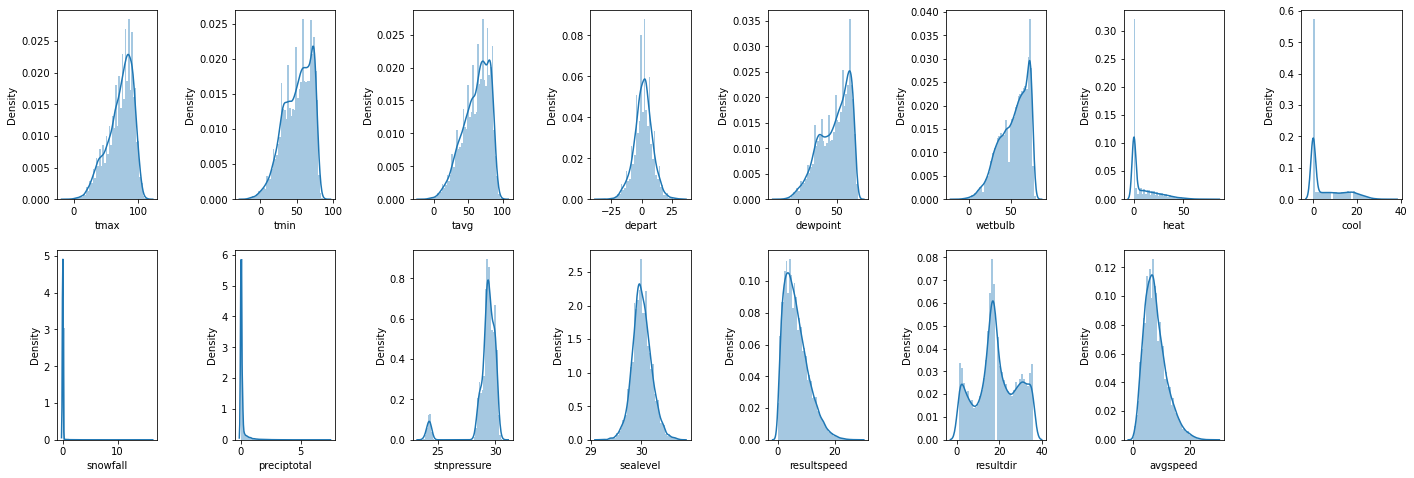

In [16]:
cols = ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint','wetbulb', 'heat', 'cool', 'snowfall','preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir','avgspeed']
plt.figure(figsize=(20, 7))
for idx, col in enumerate(cols):
    plt.subplot(2, 8, idx + 1)
    sns.distplot(weatherTemp[col])
plt.tight_layout(pad=2, h_pad=2)
plt.show()

##### as we can see , there are features that distbute normally , there some the distrbute right asymmetrically and some other destibuations

### i will add a boxplot plot , it will give us a vision about statistical information like Q1,Q2,outliers,etc. 

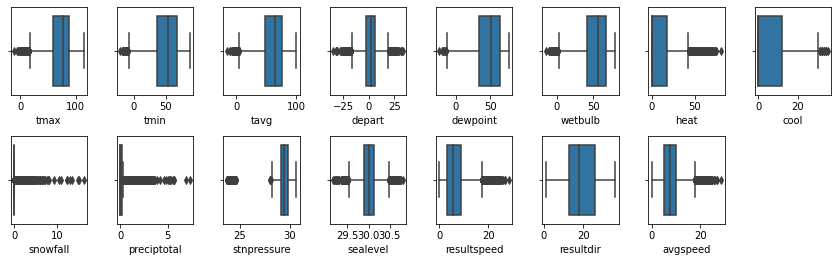

In [17]:
cols = ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint','wetbulb', 'heat', 'cool', 'snowfall','preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir','avgspeed']
plt.figure(figsize=(12, 4))
for idx, col in enumerate(cols):
    plt.subplot(2, 8, idx + 1)
    sns.boxplot(weatherTemp[col], whis=1.5)
plt.tight_layout(pad=2, h_pad=1)
plt.show()

#### boxplot is a very popular statics tool that describe the data by the mean and Q1,Q3,IQR, and outliers this should help me in the preproccesing

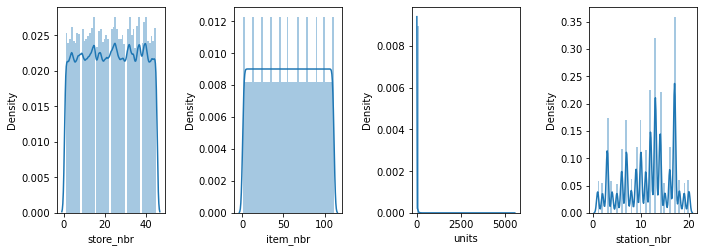

In [18]:
cols = ['store_nbr', 'item_nbr', 'units', 'station_nbr']
plt.figure(figsize=(20, 7))
for idx, col in enumerate(cols):
    plt.subplot(2, 8, idx + 1)
    sns.distplot(keyMergeSales[col])
plt.tight_layout(pad=2, h_pad=2)
plt.show()

### let's see the correlations and the relashonships beetwen the variables of our datasets , this plot will give us information about the relationship (linear, quadric, no relationship, etc.)

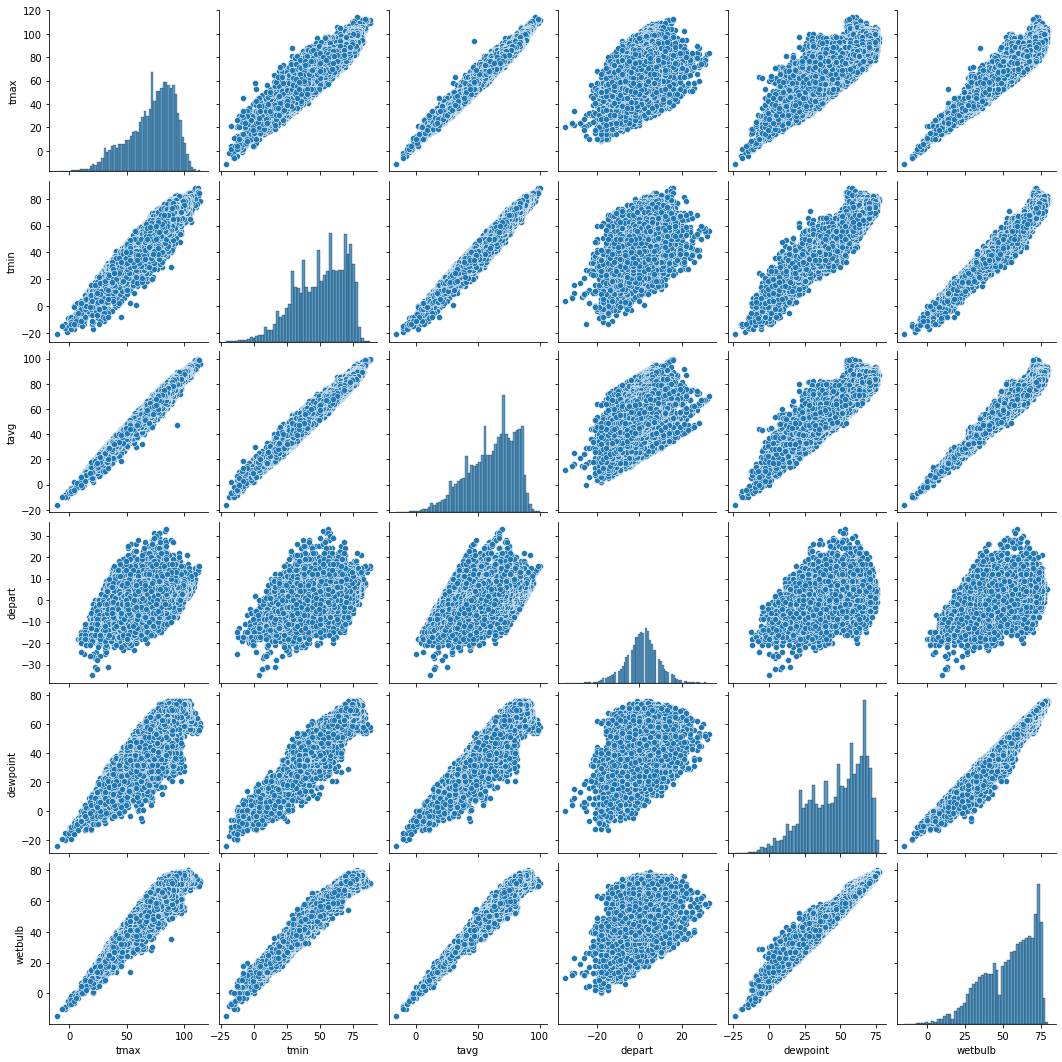

In [19]:
cols = ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb']
sns.pairplot(weatherTemp[cols])
plt.show()

#### as we can see thier is some linear releshinship and there some variables thats there a weak correlation beetwen them 

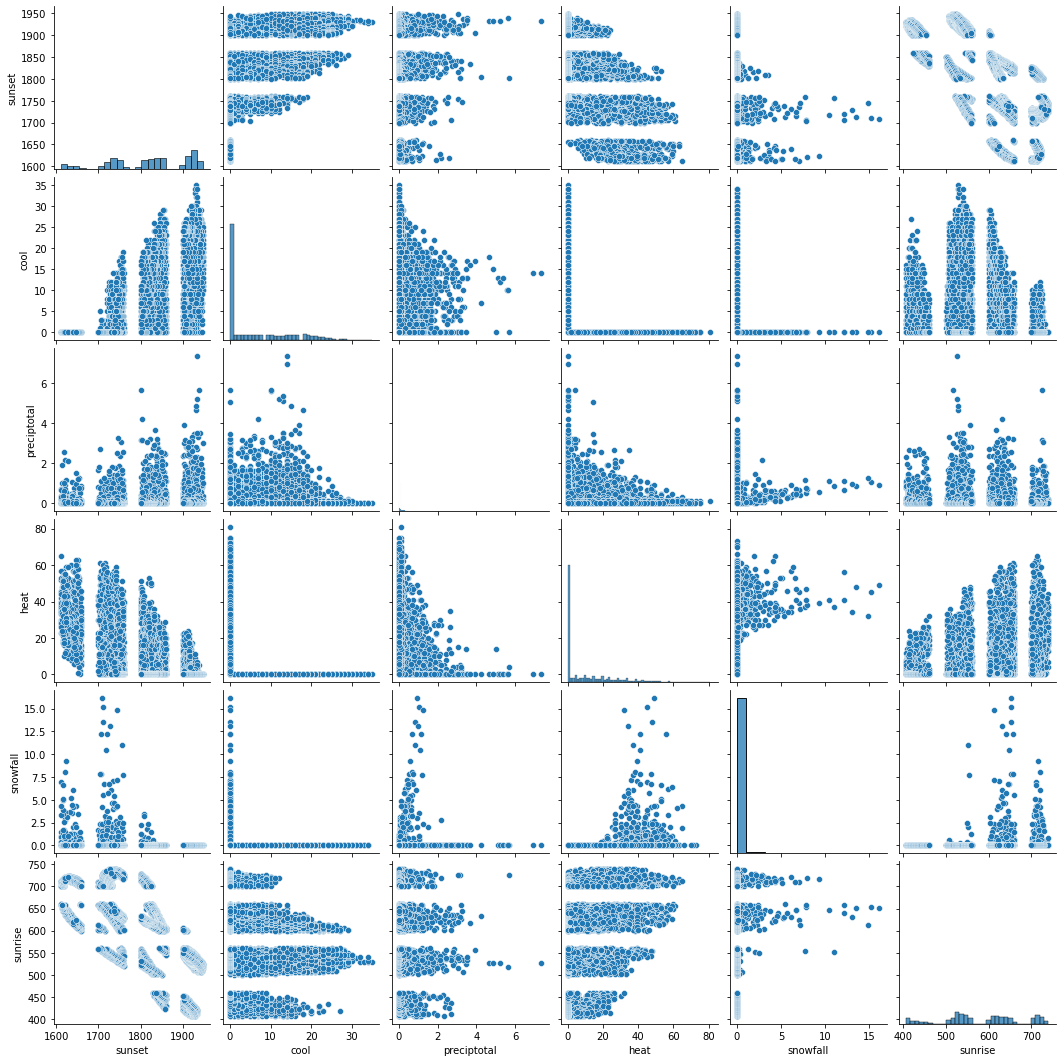

In [20]:
cols =cols = ['sunset', 'cool', 'preciptotal', 'heat', 'snowfall', 'sunrise']
sns.pairplot(weatherTemp[cols])
plt.show()

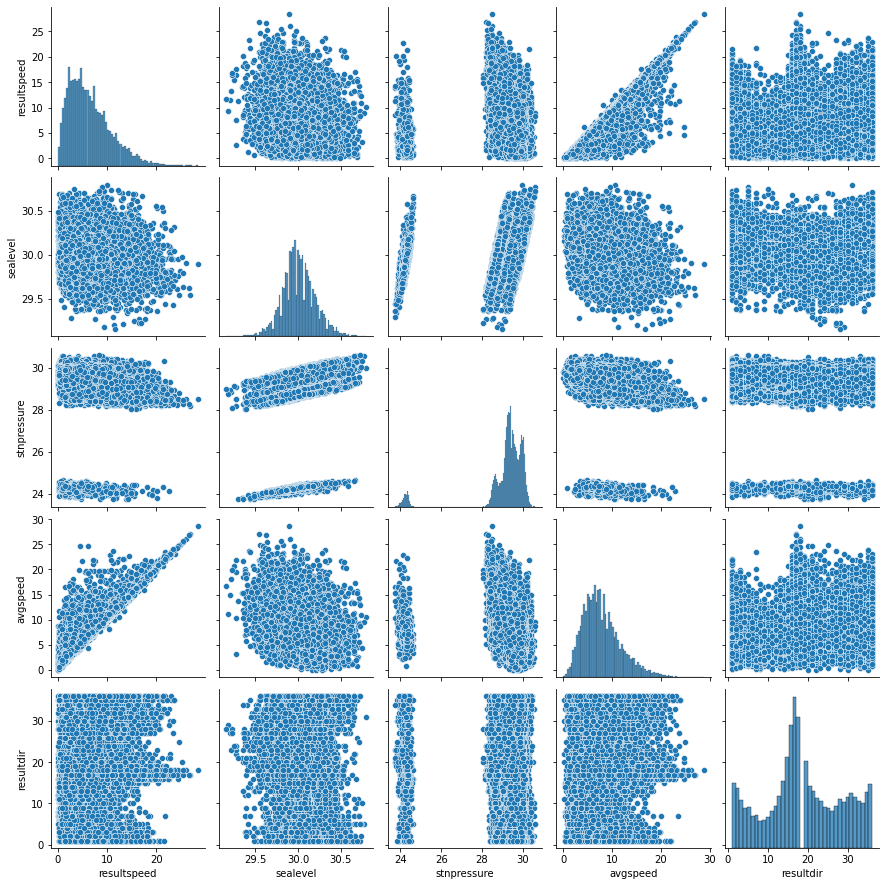

In [21]:
cols = ['resultspeed', 'sealevel', 'stnpressure', 'avgspeed', 'resultdir']
sns.pairplot(weatherTemp[cols])
plt.show()

### let's check our relashonship and correlation beetwen our variables in weather dataset by a hearmap

### if the variables are storngly colrrelated the value will be to close to 1 or -1

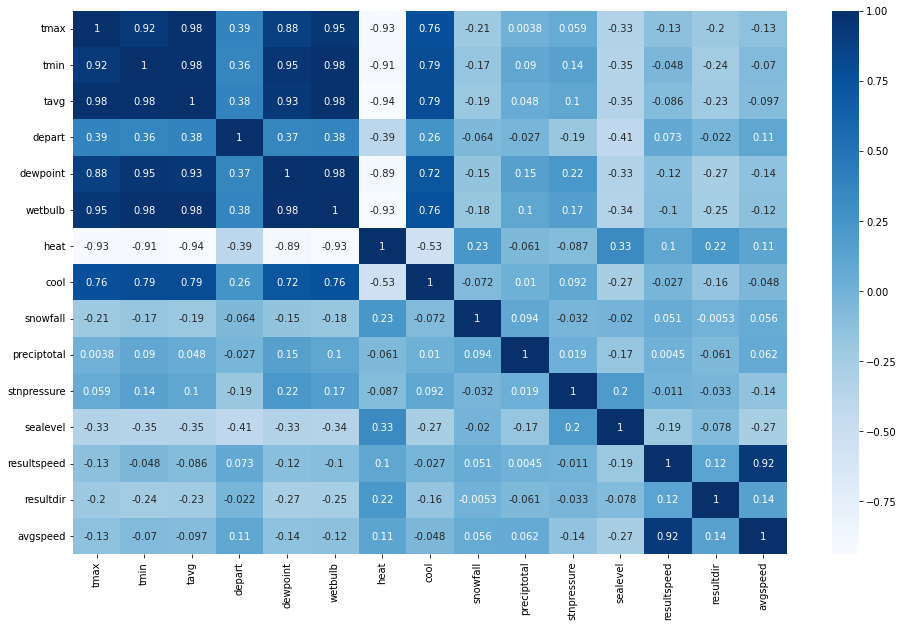

In [22]:
cols = ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint','wetbulb', 'heat', 'cool', 'snowfall','preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir','avgspeed']
plt.figure(figsize=(16, 10))
sns.heatmap(weatherTemp[cols].corr(), annot=True, cmap='Blues')
plt.show()

# Section B : Data Pre-processing  <a class="anchor" id="section3"></a>

#### first of all i wanna find the propability to get a observation equal to nan : P((obesrvation = nan) = true), in addition to choose which features i may drop

In [23]:
def probNan(dataset):
    dataF = pd.DataFrame()
    for clo in dataset.columns:
        dic = {}
        dic["name"] = clo
        dic["null"] = round((dataset[clo].isnull().sum()) / len(dataset[clo]), 2)
        dataF = dataF.append(dic, ignore_index=True)
    return dataF

In [24]:
probNan(weatherTemp)

name  null
0   station_nbr  0.00
1          date  0.00
2          tmax  0.04
3          tmin  0.04
4          tavg  0.07
5        depart  0.56
6      dewpoint  0.03
7       wetbulb  0.06
8          heat  0.07
9          cool  0.07
10      sunrise  0.47
11       sunset  0.47
12      codesum  0.00
13     snowfall  0.35
14  preciptotal  0.04
15  stnpressure  0.05
16     sealevel  0.08
17  resultspeed  0.03
18    resultdir  0.03
19     avgspeed  0.04

In [25]:
probNan(salesTemp)

name  null
0       date   0.0
1  store_nbr   0.0
2   item_nbr   0.0
3      units   0.0

#### i will drop the columns that have ~0.50 or null>0.50 columns of null


In [26]:
weatherTemp = weatherTemp.drop(['sunrise', 'sunset', 'depart'], axis=1)

In [27]:
tableInfo(weatherTemp)

name    null  unique            type
0   station_nbr     0.0    20.0           int64
1          date     0.0  1035.0  datetime64[ns]
2          tmax   906.0   121.0         float64
3          tmin   908.0   108.0         float64
4          tavg  1469.0   112.0         float64
5      dewpoint   666.0    99.0         float64
6       wetbulb  1252.0    93.0         float64
7          heat  1469.0    77.0         float64
8          cool  1469.0    37.0         float64
9       codesum     0.0   449.0          object
10     snowfall  7224.0    77.0         float64
11  preciptotal   860.0   285.0         float64
12  stnpressure   929.0   322.0         float64
13     sealevel  1724.0   153.0         float64
14  resultspeed   589.0   248.0         float64
15    resultdir   589.0    37.0         float64
16     avgspeed   875.0   254.0         float64

#### we are going to create new features by the date feature that called week,weekday,month,day,year,weekend 

### in the next sections i will drop the date feature so i must add day,month,year

### the weekend is very important because normally the sales at weekends days is higher than a regular day

In [28]:
weatherTemp["week"] = weatherTemp.date.dt.week 
weatherTemp["weekday"] = weatherTemp.date.dt.weekday
weatherTemp["month"] = weatherTemp.date.dt.month
weatherTemp["day"] = weatherTemp.date.dt.day
weatherTemp["year"] = weatherTemp.date.dt.year
weatherTemp["weekend"] = weatherTemp["weekday"].apply(lambda x : 1 if x>=5 else 0) # checking if this day is weekend or not i see that relevant comparing to our real life
weatherTemp

station_nbr       date  tmax  tmin  tavg  dewpoint  wetbulb  heat  \
0                1 2012-01-01  52.0  31.0  42.0      36.0     40.0  23.0   
1                2 2012-01-01  48.0  33.0  41.0      37.0     39.0  24.0   
2                3 2012-01-01  55.0  34.0  45.0      24.0     36.0  20.0   
3                4 2012-01-01  63.0  47.0  55.0      28.0     43.0  10.0   
4                6 2012-01-01  63.0  34.0  49.0      31.0     43.0  16.0   
...            ...        ...   ...   ...   ...       ...      ...   ...   
20512           16 2014-10-31  53.0  34.0  44.0      35.0     41.0  21.0   
20513           17 2014-10-31  59.0  34.0  47.0      32.0     41.0  18.0   
20514           18 2014-10-31  67.0  49.0  58.0      40.0     50.0   7.0   
20515           19 2014-10-31  45.0  33.0  39.0      24.0     32.0  26.0   
20516           20 2014-10-31  68.0  50.0  59.0      39.0     50.0   6.0   

       cool     codesum  ...  sealevel  resultspeed  resultdir  avgspeed  \
0       0.0  RA FZFG BR  ...     29.92          3.6       20.0       4.6   
1       0.0          RA  ...     29.91          9.1       23.0      11.3   
2       0.0              ...     30.47          9.9       31.0      10.0   
3       0.0              ...     30.48          8.0       35.0       8.2   
4       0.0              ...     30.47         14.0       36.0      13.8   
...     ...         ...  ...       ...          ...        ...       ...   
20512   0.0              ...     29.99          4.5        3.0       5.3   
20513   0.0          RA  ...     30.39          9.2        1.0       9.3   
20514   0.0              ...     30.28         10.6       36.0      11.2   
20515   0.0       RA SN  ...     30.24         20.4       34.0      20.9   
20516   0.0              ...     30.27         10.5       36.0      11.2   

       week  weekday  month  day  year  weekend  
0        52        6      1    1  2012        1  
1        52        6      1    1  2012        1  
2        52        6      1    1  2012        1  
3        52        6      1    1  2012        1  
4        52        6      1    1  2012        1  
...     ...      ...    ...  ...   ...      ...  
20512    44        4     10   31  2014        0  
20513    44        4     10   31  2014        0  
20514    44        4     10   31  2014        0  
20515    44        4     10   31  2014        0  
20516    44        4     10   31  2014        0  

[20517 rows x 23 columns]

In [29]:
# i wanna save  some columns
codeSumSaver = weatherTemp['codesum'].copy()
dateTempSaver = weatherTemp['date'].copy()

In [30]:
weatherTemp = weatherTemp.drop(['date','codesum'], axis=1)
weatherTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station_nbr  20517 non-null  int64  
 1   tmax         19611 non-null  float64
 2   tmin         19609 non-null  float64
 3   tavg         19048 non-null  float64
 4   dewpoint     19851 non-null  float64
 5   wetbulb      19265 non-null  float64
 6   heat         19048 non-null  float64
 7   cool         19048 non-null  float64
 8   snowfall     13293 non-null  float64
 9   preciptotal  19657 non-null  float64
 10  stnpressure  19588 non-null  float64
 11  sealevel     18793 non-null  float64
 12  resultspeed  19928 non-null  float64
 13  resultdir    19928 non-null  float64
 14  avgspeed     19642 non-null  float64
 15  week         20517 non-null  int64  
 16  weekday      20517 non-null  int64  
 17  month        20517 non-null  int64  
 18  day          20517 non-null  int64  
 19  year

### i wanna use knn to impute null values in our dataset

In [31]:
imputer = KNNImputer(n_neighbors=5, weights="distance")
imputed = imputer.fit_transform(weatherTemp)
weatherTemp[weatherTemp.columns] = imputed

In [32]:
tableInfo(weatherTemp)

name  null  unique     type
0   station_nbr   0.0    20.0  float64
1          tmax   0.0  1026.0  float64
2          tmin   0.0  1014.0  float64
3          tavg   0.0  1580.0  float64
4      dewpoint   0.0   764.0  float64
5       wetbulb   0.0  1341.0  float64
6          heat   0.0   957.0  float64
7          cool   0.0   976.0  float64
8      snowfall   0.0  1319.0  float64
9   preciptotal   0.0   928.0  float64
10  stnpressure   0.0  1250.0  float64
11     sealevel   0.0  1876.0  float64
12  resultspeed   0.0   836.0  float64
13    resultdir   0.0   625.0  float64
14     avgspeed   0.0  1128.0  float64
15         week   0.0    52.0  float64
16      weekday   0.0     7.0  float64
17        month   0.0    12.0  float64
18          day   0.0    31.0  float64
19         year   0.0     3.0  float64
20      weekend   0.0     2.0  float64

In [33]:
section_f = weatherTemp.copy()#saving to section f

In [34]:
weatherTemp['station_nbr'] = weather['station_nbr']
weatherTemp['date'] = dateTempSaver

### let's check the outliers in our dataset and check if we need to do something, if a column have so much of outliers i will choose if too drop it or not

In [35]:
def getIQR(dataset):
    cols = ['tmax', 'tmin', 'tavg', 'dewpoint','wetbulb', 'heat', 'cool', 'snowfall','preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir','avgspeed']
    dataF = pd.DataFrame()
    for clo in cols:
        dic={} 
        Q1 = np.percentile(dataset[clo],25)
        Q3 = np.percentile(dataset[clo],75)
        IQR = Q3 - Q1
        dic["name"] = clo
        dic["IQR"] = IQR
        dataF = dataF.append(dic, ignore_index=True)
    return dataF
IQRS = getIQR(weatherTemp)
display(IQRS) 
print('============================================================')

def getHowMuchOutliers(dataset, IQRS):
    dataF = pd.DataFrame()
    cols = ['tmax', 'tmin', 'tavg', 'dewpoint','wetbulb', 'heat', 'cool', 'snowfall','preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir','avgspeed']
    idx = 0
    for clo in cols:
        outliers = []
        dic={}
        Q1 = np.percentile(dataset[clo],25)
        Q3 = np.percentile(dataset[clo],75)
        IQR = IQRS["IQR"][idx]
        outlier_Obs = IQR * 1.5
        dic['feature name'] = clo
        outliers = dataset[(dataset[clo]< Q1 - outlier_Obs)|( dataset[clo] > Q3 + outlier_Obs)].index
        dic['number of outliers'] = len(outliers)
        dataF = dataF.append(dic, ignore_index=True)
        idx += 1
    return dataF
outliers = getHowMuchOutliers(weatherTemp, IQRS)
display(outliers)

name        IQR
0          tmax  28.000000
1          tmin  30.000000
2          tavg  28.000000
3      dewpoint  31.000000
4       wetbulb  26.011107
5          heat  16.052025
6          cool  12.000000
7      snowfall   0.000000
8   preciptotal   0.114701
9   stnpressure   0.640000
10     sealevel   0.226041
11  resultspeed   5.600000
12    resultdir  13.000000
13     avgspeed   5.000000

feature name  number of outliers
0          tmax               123.0
1          tmin                44.0
2          tavg                87.0
3      dewpoint                14.0
4       wetbulb                60.0
5          heat               877.0
6          cool                16.0
7      snowfall              1853.0
8   preciptotal              1965.0
9   stnpressure              1038.0
10     sealevel               472.0
11  resultspeed               361.0
12    resultdir                 0.0
13     avgspeed               440.0

### יש לי כמה נקודות להסביר על ה חריגים לפי החקירה שלנו וההבנה שלנו

### preciptotal :

### ניתן לראות שיש לה הרבה חריגים אבל זה לגטימי כי אנחנו דברים על משקעים וייתכן ימים כל כך גשמים וייתכן ימים יבשים מאוד וכנראה הימים היבשים היו הרבה בגלל זה מספר החריגים כל כך גדול


In [36]:
weatherTemp = weatherTemp.drop('stnpressure', axis=1) # too many outliers

#### we will add a function that create a new column (binary column): 

#### 1 : rained

#### 0 : not rained


#### for section D 

In [37]:
def addItRainedCol(preciptotal, snowfall):
    tempPre = preciptotal.to_numpy()
    snowPre = snowfall.to_numpy()
    rained = []
    for idx in range(len(tempPre)):
        if tempPre[idx] > 0 or snowPre[idx] > 0:
            rained.append(1)
        elif tempPre[idx] == 0 and snowPre[idx] == 0:
            rained.append(0)
        
    return np.array(rained)

rained = addItRainedCol(weatherTemp['preciptotal'], weatherTemp['snowfall'])
weatherTemp["rained"] = rained


In [38]:
weatherTemp

station_nbr  tmax  tmin  tavg  dewpoint  wetbulb  heat  cool  snowfall  \
0                1  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   
1                2  48.0  33.0  41.0      37.0     39.0  24.0   0.0  0.000000   
2                3  55.0  34.0  45.0      24.0     36.0  20.0   0.0  0.000000   
3                4  63.0  47.0  55.0      28.0     43.0  10.0   0.0  0.000000   
4                6  63.0  34.0  49.0      31.0     43.0  16.0   0.0  0.000000   
...            ...   ...   ...   ...       ...      ...   ...   ...       ...   
20512           16  53.0  34.0  44.0      35.0     41.0  21.0   0.0  0.000000   
20513           17  59.0  34.0  47.0      32.0     41.0  18.0   0.0  0.000000   
20514           18  67.0  49.0  58.0      40.0     50.0   7.0   0.0  0.000000   
20515           19  45.0  33.0  39.0      24.0     32.0  26.0   0.0  0.100000   
20516           20  68.0  50.0  59.0      39.0     50.0   6.0   0.0  0.000000   

       preciptotal  ...  resultdir  avgspeed  week  weekday  month   day  \
0             0.05  ...       20.0       4.6  52.0      6.0    1.0   1.0   
1             0.07  ...       23.0      11.3  52.0      6.0    1.0   1.0   
2             0.00  ...       31.0      10.0  52.0      6.0    1.0   1.0   
3             0.00  ...       35.0       8.2  52.0      6.0    1.0   1.0   
4             0.00  ...       36.0      13.8  52.0      6.0    1.0   1.0   
...            ...  ...        ...       ...   ...      ...    ...   ...   
20512         0.00  ...        3.0       5.3  44.0      4.0   10.0  31.0   
20513         0.00  ...        1.0       9.3  44.0      4.0   10.0  31.0   
20514         0.00  ...       36.0      11.2  44.0      4.0   10.0  31.0   
20515         0.02  ...       34.0      20.9  44.0      4.0   10.0  31.0   
20516         0.00  ...       36.0      11.2  44.0      4.0   10.0  31.0   

         year  weekend       date  rained  
0      2012.0      1.0 2012-01-01       1  
1      2012.0      1.0 2012-01-01       1  
2      2012.0      1.0 2012-01-01       0  
3      2012.0      1.0 2012-01-01       0  
4      2012.0      1.0 2012-01-01       0  
...       ...      ...        ...     ...  
20512  2014.0      0.0 2014-10-31       0  
20513  2014.0      0.0 2014-10-31       0  
20514  2014.0      0.0 2014-10-31       0  
20515  2014.0      0.0 2014-10-31       1  
20516  2014.0      0.0 2014-10-31       0  

[20517 rows x 22 columns]

### i wanna add new column that describe how bad the weather is: it may provide a important data to our models because in real life , when the weather is too bad the sales decrease 

#### tornado/waterspout , duststorm, funnelcloud, thundrestorm, heavyfog, volcanic -> bad weather

#### rain ... -> medium weather

#### nan -> moderate


#### bad: +FC, FC, TS, FG+, VA,DS - will get the number 3 on the scale from 1-3

#### medium :will get the number 2 on the scale from 1-3

#### moderate: 1

    

In [39]:
# tornado/waterspout , duststorm, funnelcloud, thundrestorm, heavyfog, volcanic -> bad weather
# rain ... -> medium weather
# nan -> moderate
# bad: +FC, FC, TS, FG+, VA,DS - will get the number 3 on the scale from 1-3
#medium :will get the number 2 on the scale from 1-3
#moderate: 1

bad = ['+FC', 'FC', 'TS', 'FG+', 'VA','DS']
medium = ['GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL', 'IC',
      'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'PO', 'SO', 'SA', 'SS',
      'PY', 'SQ', 'DR', 'SH', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC', 'FZFG', 'MIFG']
tempW = []
for item in codeSumSaver:
    listOfCode = item.split(' ')
    for lo in listOfCode:
        if lo in bad:
            tempW.append(3)
            break
        elif lo in medium:
            tempW.append(2)
            break
        else:
            tempW.append(1)
            break
print(len(tempW))

weatherTemp['weatherSc'] = np.array(tempW)


20517


In [40]:
weatherTemp

station_nbr  tmax  tmin  tavg  dewpoint  wetbulb  heat  cool  snowfall  \
0                1  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   
1                2  48.0  33.0  41.0      37.0     39.0  24.0   0.0  0.000000   
2                3  55.0  34.0  45.0      24.0     36.0  20.0   0.0  0.000000   
3                4  63.0  47.0  55.0      28.0     43.0  10.0   0.0  0.000000   
4                6  63.0  34.0  49.0      31.0     43.0  16.0   0.0  0.000000   
...            ...   ...   ...   ...       ...      ...   ...   ...       ...   
20512           16  53.0  34.0  44.0      35.0     41.0  21.0   0.0  0.000000   
20513           17  59.0  34.0  47.0      32.0     41.0  18.0   0.0  0.000000   
20514           18  67.0  49.0  58.0      40.0     50.0   7.0   0.0  0.000000   
20515           19  45.0  33.0  39.0      24.0     32.0  26.0   0.0  0.100000   
20516           20  68.0  50.0  59.0      39.0     50.0   6.0   0.0  0.000000   

       preciptotal  ...  avgspeed  week  weekday  month   day    year  \
0             0.05  ...       4.6  52.0      6.0    1.0   1.0  2012.0   
1             0.07  ...      11.3  52.0      6.0    1.0   1.0  2012.0   
2             0.00  ...      10.0  52.0      6.0    1.0   1.0  2012.0   
3             0.00  ...       8.2  52.0      6.0    1.0   1.0  2012.0   
4             0.00  ...      13.8  52.0      6.0    1.0   1.0  2012.0   
...            ...  ...       ...   ...      ...    ...   ...     ...   
20512         0.00  ...       5.3  44.0      4.0   10.0  31.0  2014.0   
20513         0.00  ...       9.3  44.0      4.0   10.0  31.0  2014.0   
20514         0.00  ...      11.2  44.0      4.0   10.0  31.0  2014.0   
20515         0.02  ...      20.9  44.0      4.0   10.0  31.0  2014.0   
20516         0.00  ...      11.2  44.0      4.0   10.0  31.0  2014.0   

       weekend       date  rained  weatherSc  
0          1.0 2012-01-01       1          2  
1          1.0 2012-01-01       1          2  
2          1.0 2012-01-01       0          1  
3          1.0 2012-01-01       0          1  
4          1.0 2012-01-01       0          1  
...        ...        ...     ...        ...  
20512      0.0 2014-10-31       0          1  
20513      0.0 2014-10-31       0          2  
20514      0.0 2014-10-31       0          1  
20515      0.0 2014-10-31       1          2  
20516      0.0 2014-10-31       0          1  

[20517 rows x 23 columns]

#### # https://www.calendar-365.com/holidays/2012.html#:~:text=2012%20Holidays%20%20%20%20Date%20%20,%20%20-%20%2039%20more%20rows%20?msclkid=3d00e70ececd11eca717087c7360b65d

#### i wanna add holiday column based on the historical calendar in addition to give more information to our model about the sales , the sales increase in our real life in holidays , weekends etc.

In [41]:
x = []
x.append(datetime.datetime(2012, 1, 1))
x.append(datetime.datetime(2012, 2, 14))
x.append(datetime.datetime(2012, 4, 1))
x.append(datetime.datetime(2012, 4, 6))
x.append(datetime.datetime(2012, 4, 8))
x.append(datetime.datetime(2012, 4, 9))
x.append(datetime.datetime(2012, 5, 13))
x.append(datetime.datetime(2012, 6, 17))
x.append(datetime.datetime(2012, 7, 22))
x.append(datetime.datetime(2012, 10, 31))
x.append(datetime.datetime(2012, 11, 23))
x.append(datetime.datetime(2012, 12, 25))
x.append(datetime.datetime(2012, 12, 31))

x.append(datetime.datetime(2013, 1, 1))
x.append(datetime.datetime(2013, 2, 14))
x.append(datetime.datetime(2013, 3, 29))
x.append(datetime.datetime(2013, 3, 31))
x.append(datetime.datetime(2013, 4, 1))
x.append(datetime.datetime(2013, 5, 12))
x.append(datetime.datetime(2013, 6, 16))
x.append(datetime.datetime(2013, 7, 28))
x.append(datetime.datetime(2013, 9, 11))
x.append(datetime.datetime(2013, 10, 19))
x.append(datetime.datetime(2013, 10, 31))
x.append(datetime.datetime(2013, 11, 29))
x.append(datetime.datetime(2013, 11, 29))
x.append(datetime.datetime(2013, 12, 25))
x.append(datetime.datetime(2013, 12, 31))

x.append(datetime.datetime(2013, 1, 1))
x.append(datetime.datetime(2013, 2, 14))
x.append(datetime.datetime(2013, 3, 29))
x.append(datetime.datetime(2013, 3, 31))
x.append(datetime.datetime(2013, 4, 1))
x.append(datetime.datetime(2013, 5, 12))
x.append(datetime.datetime(2013, 6, 16))
x.append(datetime.datetime(2013, 7, 28))
x.append(datetime.datetime(2013, 9, 11))
x.append(datetime.datetime(2013, 10, 19))
x.append(datetime.datetime(2013, 10, 31))
x.append(datetime.datetime(2013, 11, 29))
x.append(datetime.datetime(2013, 11, 29))
x.append(datetime.datetime(2013, 12, 25))
x.append(datetime.datetime(2013, 12, 31))


x.append(datetime.datetime(2014, 1, 1))
x.append(datetime.datetime(2014, 2, 14))
x.append(datetime.datetime(2014, 3, 29))
x.append(datetime.datetime(2014, 3, 31))
x.append(datetime.datetime(2014, 4, 1))
x.append(datetime.datetime(2014, 4, 18))
x.append(datetime.datetime(2014, 4, 20))
x.append(datetime.datetime(2014, 4, 21))
x.append(datetime.datetime(2014, 5, 11))
x.append(datetime.datetime(2014, 6, 15))
x.append(datetime.datetime(2014, 7, 27))
x.append(datetime.datetime(2014, 10, 18))
x.append(datetime.datetime(2014, 10, 31))
x.append(datetime.datetime(2014, 11, 28))
x.append(datetime.datetime(2014, 12, 31))
x.append(datetime.datetime(2014, 12, 25))
x.append(datetime.datetime(2014, 12, 31))

holidays = []
for clo in weatherTemp['date']:
    if clo in x:
        holidays.append(1)
    else:
        holidays.append(0)
weatherTemp['holiday'] = np.array(holidays)

In [42]:
weatherTemp

station_nbr  tmax  tmin  tavg  dewpoint  wetbulb  heat  cool  snowfall  \
0                1  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   
1                2  48.0  33.0  41.0      37.0     39.0  24.0   0.0  0.000000   
2                3  55.0  34.0  45.0      24.0     36.0  20.0   0.0  0.000000   
3                4  63.0  47.0  55.0      28.0     43.0  10.0   0.0  0.000000   
4                6  63.0  34.0  49.0      31.0     43.0  16.0   0.0  0.000000   
...            ...   ...   ...   ...       ...      ...   ...   ...       ...   
20512           16  53.0  34.0  44.0      35.0     41.0  21.0   0.0  0.000000   
20513           17  59.0  34.0  47.0      32.0     41.0  18.0   0.0  0.000000   
20514           18  67.0  49.0  58.0      40.0     50.0   7.0   0.0  0.000000   
20515           19  45.0  33.0  39.0      24.0     32.0  26.0   0.0  0.100000   
20516           20  68.0  50.0  59.0      39.0     50.0   6.0   0.0  0.000000   

       preciptotal  ...  week  weekday  month   day    year  weekend  \
0             0.05  ...  52.0      6.0    1.0   1.0  2012.0      1.0   
1             0.07  ...  52.0      6.0    1.0   1.0  2012.0      1.0   
2             0.00  ...  52.0      6.0    1.0   1.0  2012.0      1.0   
3             0.00  ...  52.0      6.0    1.0   1.0  2012.0      1.0   
4             0.00  ...  52.0      6.0    1.0   1.0  2012.0      1.0   
...            ...  ...   ...      ...    ...   ...     ...      ...   
20512         0.00  ...  44.0      4.0   10.0  31.0  2014.0      0.0   
20513         0.00  ...  44.0      4.0   10.0  31.0  2014.0      0.0   
20514         0.00  ...  44.0      4.0   10.0  31.0  2014.0      0.0   
20515         0.02  ...  44.0      4.0   10.0  31.0  2014.0      0.0   
20516         0.00  ...  44.0      4.0   10.0  31.0  2014.0      0.0   

            date  rained  weatherSc  holiday  
0     2012-01-01       1          2        1  
1     2012-01-01       1          2        1  
2     2012-01-01       0          1        1  
3     2012-01-01       0          1        1  
4     2012-01-01       0          1        1  
...          ...     ...        ...      ...  
20512 2014-10-31       0          1        1  
20513 2014-10-31       0          2        1  
20514 2014-10-31       0          1        1  
20515 2014-10-31       1          2        1  
20516 2014-10-31       0          1        1  

[20517 rows x 24 columns]

#### merging the sales and weather datasets and creating the keysum column in addition to prepare it to section C 

In [43]:
keyMergeSales

date  store_nbr  item_nbr  units  station_nbr
0       2012-01-01          1         1      0            1
1       2012-01-01          1         2      0            1
2       2012-01-01          1         3      0            1
3       2012-01-01          1         4      0            1
4       2012-01-01          1         5      0            1
...            ...        ...       ...    ...          ...
4617595 2014-10-31         35       107      0            5
4617596 2014-10-31         35       108      0            5
4617597 2014-10-31         35       109      0            5
4617598 2014-10-31         35       110      0            5
4617599 2014-10-31         35       111      0            5

[4617600 rows x 5 columns]

In [44]:
sectionB = pd.merge(left=weatherTemp, right=keyMergeSales, how='inner', on=['station_nbr', 'date'])
sectionB.head(10)

station_nbr  tmax  tmin  tavg  dewpoint  wetbulb  heat  cool  snowfall  \
0            1  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   
1            1  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   
2            1  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   
3            1  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   
4            1  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   
5            1  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   
6            1  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   
7            1  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   
8            1  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   
9            1  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   

   preciptotal  ...  day    year  weekend       date  rained  weatherSc  \
0         0.05  ...  1.0  2012.0      1.0 2012-01-01       1          2   
1         0.05  ...  1.0  2012.0      1.0 2012-01-01       1          2   
2         0.05  ...  1.0  2012.0      1.0 2012-01-01       1          2   
3         0.05  ...  1.0  2012.0      1.0 2012-01-01       1          2   
4         0.05  ...  1.0  2012.0      1.0 2012-01-01       1          2   
5         0.05  ...  1.0  2012.0      1.0 2012-01-01       1          2   
6         0.05  ...  1.0  2012.0      1.0 2012-01-01       1          2   
7         0.05  ...  1.0  2012.0      1.0 2012-01-01       1          2   
8         0.05  ...  1.0  2012.0      1.0 2012-01-01       1          2   
9         0.05  ...  1.0  2012.0      1.0 2012-01-01       1          2   

   holiday  store_nbr  item_nbr  units  
0        1          1         1      0  
1        1          1         2      0  
2        1          1         3      0  
3        1          1         4      0  
4        1          1         5      0  
5        1          1         6      0  
6        1          1         7      0  
7        1          1         8      0  
8        1          1         9     29  
9        1          1        10      0  

[10 rows x 27 columns]

In [45]:
t = pd.DataFrame() # taking only the needed comumns (for the homework)
t = t.append(sectionB[sectionB['item_nbr'] == 5])
t = t.append(sectionB[sectionB['item_nbr'] == 6])
t = t.append(sectionB[sectionB['item_nbr'] == 9])
t = t.append(sectionB[sectionB['item_nbr'] == 16])
t = t.append(sectionB[sectionB['item_nbr'] == 45])


In [46]:
g = t.groupby(['store_nbr', 'date']).sum().reset_index() # group by and using the sum method to create the key_sum
g.head()

store_nbr       date  station_nbr   tmax   tmin   tavg  dewpoint  wetbulb  \
0          1 2012-01-01            5  260.0  155.0  210.0     180.0    200.0   
1          1 2012-01-02            5  250.0  155.0  205.0     130.0    175.0   
2          1 2012-01-03            5  160.0   55.0  110.0      20.0     90.0   
3          1 2012-01-04            5  140.0   45.0   95.0      -5.0     70.0   
4          1 2012-01-05            5  190.0  125.0  160.0      65.0    125.0   

    heat  cool  ...  weekday  month   day     year  weekend  rained  \
0  115.0   0.0  ...     30.0    5.0   5.0  10060.0      5.0       5   
1  120.0   0.0  ...      0.0    5.0  10.0  10060.0      0.0       5   
2  215.0   0.0  ...      5.0    5.0  15.0  10060.0      0.0       5   
3  230.0   0.0  ...     10.0    5.0  20.0  10060.0      0.0       5   
4  165.0   0.0  ...     15.0    5.0  25.0  10060.0      0.0       5   

   weatherSc  holiday  item_nbr  units  
0         10        5        81     29  
1          5        0        81     60  
2          5        0        81     15  
3          5        0        81     20  
4          5        0        81     16  

[5 rows x 27 columns]

In [47]:
key_builder = g[['store_nbr', 'date', 'units']].copy()
key_builder

store_nbr       date  units
0              1 2012-01-01     29
1              1 2012-01-02     60
2              1 2012-01-03     15
3              1 2012-01-04     20
4              1 2012-01-05     16
...          ...        ...    ...
41595         45 2014-10-27     50
41596         45 2014-10-28     33
41597         45 2014-10-29     15
41598         45 2014-10-30     12
41599         45 2014-10-31     10

[41600 rows x 3 columns]

In [48]:
key_builder.rename(columns = {'units':'key_sum'}, inplace = True)#rename the column
key_builder

store_nbr       date  key_sum
0              1 2012-01-01       29
1              1 2012-01-02       60
2              1 2012-01-03       15
3              1 2012-01-04       20
4              1 2012-01-05       16
...          ...        ...      ...
41595         45 2014-10-27       50
41596         45 2014-10-28       33
41597         45 2014-10-29       15
41598         45 2014-10-30       12
41599         45 2014-10-31       10

[41600 rows x 3 columns]

In [49]:
sectionBsofi = pd.merge(left=t, right=key_builder, how='inner', on=['store_nbr', 'date'])#merging
sectionBsofi

station_nbr  tmax  tmin  tavg  dewpoint  wetbulb  heat  cool  \
0                 1  52.0  31.0  42.0      36.0     40.0  23.0   0.0   
1                 1  52.0  31.0  42.0      36.0     40.0  23.0   0.0   
2                 1  52.0  31.0  42.0      36.0     40.0  23.0   0.0   
3                 1  52.0  31.0  42.0      36.0     40.0  23.0   0.0   
4                 1  52.0  31.0  42.0      36.0     40.0  23.0   0.0   
...             ...   ...   ...   ...       ...      ...   ...   ...   
207995           20  68.0  50.0  59.0      39.0     50.0   6.0   0.0   
207996           20  68.0  50.0  59.0      39.0     50.0   6.0   0.0   
207997           20  68.0  50.0  59.0      39.0     50.0   6.0   0.0   
207998           20  68.0  50.0  59.0      39.0     50.0   6.0   0.0   
207999           20  68.0  50.0  59.0      39.0     50.0   6.0   0.0   

        snowfall  preciptotal  ...    year  weekend       date  rained  \
0       0.129276         0.05  ...  2012.0      1.0 2012-01-01       1   
1       0.129276         0.05  ...  2012.0      1.0 2012-01-01       1   
2       0.129276         0.05  ...  2012.0      1.0 2012-01-01       1   
3       0.129276         0.05  ...  2012.0      1.0 2012-01-01       1   
4       0.129276         0.05  ...  2012.0      1.0 2012-01-01       1   
...          ...          ...  ...     ...      ...        ...     ...   
207995  0.000000         0.00  ...  2014.0      0.0 2014-10-31       0   
207996  0.000000         0.00  ...  2014.0      0.0 2014-10-31       0   
207997  0.000000         0.00  ...  2014.0      0.0 2014-10-31       0   
207998  0.000000         0.00  ...  2014.0      0.0 2014-10-31       0   
207999  0.000000         0.00  ...  2014.0      0.0 2014-10-31       0   

        weatherSc  holiday  store_nbr  item_nbr  units  key_sum  
0               2        1          1         5      0       29  
1               2        1          1         6      0       29  
2               2        1          1         9     29       29  
3               2        1          1        16      0       29  
4               2        1          1        45      0       29  
...           ...      ...        ...       ...    ...      ...  
207995          1        1         17         5      0       24  
207996          1        1         17         6      0       24  
207997          1        1         17         9     24       24  
207998          1        1         17        16      0       24  
207999          1        1         17        45      0       24  

[208000 rows x 28 columns]

In [50]:
sectionBsofi = sectionBsofi.drop_duplicates(subset=['station_nbr', 'store_nbr', 'key_sum'])# droping duplicates
sectionBsofi

station_nbr  tmax  tmin  tavg  dewpoint  wetbulb  heat  cool  \
0                 1  52.0  31.0  42.0      36.0     40.0  23.0   0.0   
5                 2  48.0  33.0  41.0      37.0     39.0  24.0   0.0   
10                3  55.0  34.0  45.0      24.0     36.0  20.0   0.0   
15                3  55.0  34.0  45.0      24.0     36.0  20.0   0.0   
20                3  55.0  34.0  45.0      24.0     36.0  20.0   0.0   
...             ...   ...   ...   ...       ...      ...   ...   ...   
207710           14  77.0  45.0  61.0      39.0     50.0   4.0   0.0   
207745           17  77.0  43.0  60.0      41.0     50.0   5.0   0.0   
207830            7  58.0  38.0  48.0      32.0     41.0  17.0   0.0   
207855           10  77.0  63.0  70.0      51.0     59.0   0.0   5.0   
207920           14  60.0  38.0  49.0      31.0     42.0  16.0   0.0   

        snowfall  preciptotal  ...    year  weekend       date  rained  \
0       0.129276         0.05  ...  2012.0      1.0 2012-01-01       1   
5       0.000000         0.07  ...  2012.0      1.0 2012-01-01       1   
10      0.000000         0.00  ...  2012.0      1.0 2012-01-01       0   
15      0.000000         0.00  ...  2012.0      1.0 2012-01-01       0   
20      0.000000         0.00  ...  2012.0      1.0 2012-01-01       0   
...          ...          ...  ...     ...      ...        ...     ...   
207710  0.000000         0.00  ...  2014.0      0.0 2014-10-30       0   
207745  0.000000         0.00  ...  2014.0      0.0 2014-10-30       0   
207830  0.000000         0.00  ...  2014.0      0.0 2014-10-31       0   
207855  0.000000         0.00  ...  2014.0      0.0 2014-10-31       0   
207920  0.000000         0.00  ...  2014.0      0.0 2014-10-31       0   

        weatherSc  holiday  store_nbr  item_nbr  units  key_sum  
0               2        1          1         5      0       29  
5               2        1         16         5      0       25  
10              1        1         21         5     58       58  
15              1        1         29         5      0       98  
20              1        1         33         5      0      169  
...           ...      ...        ...       ...    ...      ...  
207710          1        0         42         5      2       42  
207745          1        0         26         5     23       41  
207830          1        1         28         5     10       32  
207855          1        1         22         5      0        3  
207920          1        1          2         5      7        7  

[6325 rows x 28 columns]

In [51]:
sectionBsofi = sectionBsofi.drop(['item_nbr', 'units'], axis=1)
sectionBsofi

station_nbr  tmax  tmin  tavg  dewpoint  wetbulb  heat  cool  \
0                 1  52.0  31.0  42.0      36.0     40.0  23.0   0.0   
5                 2  48.0  33.0  41.0      37.0     39.0  24.0   0.0   
10                3  55.0  34.0  45.0      24.0     36.0  20.0   0.0   
15                3  55.0  34.0  45.0      24.0     36.0  20.0   0.0   
20                3  55.0  34.0  45.0      24.0     36.0  20.0   0.0   
...             ...   ...   ...   ...       ...      ...   ...   ...   
207710           14  77.0  45.0  61.0      39.0     50.0   4.0   0.0   
207745           17  77.0  43.0  60.0      41.0     50.0   5.0   0.0   
207830            7  58.0  38.0  48.0      32.0     41.0  17.0   0.0   
207855           10  77.0  63.0  70.0      51.0     59.0   0.0   5.0   
207920           14  60.0  38.0  49.0      31.0     42.0  16.0   0.0   

        snowfall  preciptotal  ...  month   day    year  weekend       date  \
0       0.129276         0.05  ...    1.0   1.0  2012.0      1.0 2012-01-01   
5       0.000000         0.07  ...    1.0   1.0  2012.0      1.0 2012-01-01   
10      0.000000         0.00  ...    1.0   1.0  2012.0      1.0 2012-01-01   
15      0.000000         0.00  ...    1.0   1.0  2012.0      1.0 2012-01-01   
20      0.000000         0.00  ...    1.0   1.0  2012.0      1.0 2012-01-01   
...          ...          ...  ...    ...   ...     ...      ...        ...   
207710  0.000000         0.00  ...   10.0  30.0  2014.0      0.0 2014-10-30   
207745  0.000000         0.00  ...   10.0  30.0  2014.0      0.0 2014-10-30   
207830  0.000000         0.00  ...   10.0  31.0  2014.0      0.0 2014-10-31   
207855  0.000000         0.00  ...   10.0  31.0  2014.0      0.0 2014-10-31   
207920  0.000000         0.00  ...   10.0  31.0  2014.0      0.0 2014-10-31   

        rained  weatherSc  holiday  store_nbr  key_sum  
0            1          2        1          1       29  
5            1          2        1         16       25  
10           0          1        1         21       58  
15           0          1        1         29       98  
20           0          1        1         33      169  
...        ...        ...      ...        ...      ...  
207710       0          1        0         42       42  
207745       0          1        0         26       41  
207830       0          1        1         28       32  
207855       0          1        1         22        3  
207920       0          1        1          2        7  

[6325 rows x 26 columns]

#### let's check some variables with key_sum and check if to remove more variables

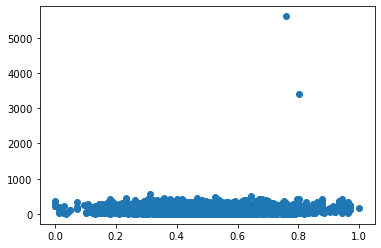

In [52]:
data_norm = (sectionBsofi['sealevel'] - sectionBsofi['sealevel'].min())/ (sectionBsofi['sealevel'].max() - sectionBsofi['sealevel'].min())
data_norm2 = (sectionBsofi['key_sum'] - sectionBsofi['key_sum'].min())/ (sectionBsofi['key_sum'].max() - sectionBsofi['key_sum'].min())
data_norm2
plt.scatter(data_norm, sectionBsofi['key_sum'] )
plt.show()

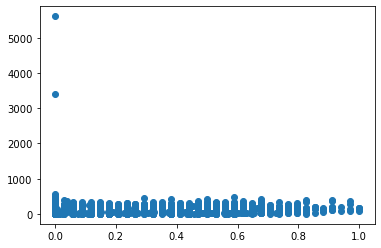

In [53]:
data_norm = (sectionBsofi['cool'] - sectionBsofi['cool'].min())/ (sectionBsofi['cool'].max() - sectionBsofi['cool'].min())
data_norm2 = (sectionBsofi['key_sum'] - sectionBsofi['key_sum'].min())/ (sectionBsofi['key_sum'].max() - sectionBsofi['key_sum'].min())
data_norm2
plt.scatter(data_norm, sectionBsofi['key_sum'] )
plt.show()

#### i will drop these two variables because they show us how bad the variance between them and key_sum

In [54]:
sectionBsofi =  sectionBsofi.drop('sealevel',axis=1)
sectionBsofi = sectionBsofi.drop('cool',axis=1)


In [55]:
sectionBsofi

station_nbr  tmax  tmin  tavg  dewpoint  wetbulb  heat  snowfall  \
0                 1  52.0  31.0  42.0      36.0     40.0  23.0  0.129276   
5                 2  48.0  33.0  41.0      37.0     39.0  24.0  0.000000   
10                3  55.0  34.0  45.0      24.0     36.0  20.0  0.000000   
15                3  55.0  34.0  45.0      24.0     36.0  20.0  0.000000   
20                3  55.0  34.0  45.0      24.0     36.0  20.0  0.000000   
...             ...   ...   ...   ...       ...      ...   ...       ...   
207710           14  77.0  45.0  61.0      39.0     50.0   4.0  0.000000   
207745           17  77.0  43.0  60.0      41.0     50.0   5.0  0.000000   
207830            7  58.0  38.0  48.0      32.0     41.0  17.0  0.000000   
207855           10  77.0  63.0  70.0      51.0     59.0   0.0  0.000000   
207920           14  60.0  38.0  49.0      31.0     42.0  16.0  0.000000   

        preciptotal  resultspeed  ...  month   day    year  weekend  \
0              0.05          3.6  ...    1.0   1.0  2012.0      1.0   
5              0.07          9.1  ...    1.0   1.0  2012.0      1.0   
10             0.00          9.9  ...    1.0   1.0  2012.0      1.0   
15             0.00          9.9  ...    1.0   1.0  2012.0      1.0   
20             0.00          9.9  ...    1.0   1.0  2012.0      1.0   
...             ...          ...  ...    ...   ...     ...      ...   
207710         0.00          4.4  ...   10.0  30.0  2014.0      0.0   
207745         0.00          2.6  ...   10.0  30.0  2014.0      0.0   
207830         0.00         11.0  ...   10.0  31.0  2014.0      0.0   
207855         0.00          6.9  ...   10.0  31.0  2014.0      0.0   
207920         0.00         11.9  ...   10.0  31.0  2014.0      0.0   

             date  rained  weatherSc  holiday store_nbr  key_sum  
0      2012-01-01       1          2        1         1       29  
5      2012-01-01       1          2        1        16       25  
10     2012-01-01       0          1        1        21       58  
15     2012-01-01       0          1        1        29       98  
20     2012-01-01       0          1        1        33      169  
...           ...     ...        ...      ...       ...      ...  
207710 2014-10-30       0          1        0        42       42  
207745 2014-10-30       0          1        0        26       41  
207830 2014-10-31       0          1        1        28       32  
207855 2014-10-31       0          1        1        22        3  
207920 2014-10-31       0          1        1         2        7  

[6325 rows x 24 columns]

# Section C : Units Sales Prediction <a class="anchor" id="section4"></a>

### (regressorion problem!)


### our measurement
$$  MSE = {\frac{1}{n}\sqrt{\Sigma_{i=1}^{n}{\Big({Predection_i -Y_i})^2}}} $$

In [56]:
temp  = sectionBsofi[sectionBsofi['year'] < 2014].copy() # taking the observation that before 2014 as the training  data
temp = temp.drop('date', axis=1)

In [57]:
temp2 = sectionBsofi[sectionBsofi['year'] > 2013].copy() # taking the observation that in 2014 as the test  data
temp2 = temp2.drop('date', axis=1)

In [58]:
X = temp
y = temp2

In [59]:
X_train = X.drop('key_sum', axis=1)
y_train = X['key_sum']
X_test = y.drop('key_sum', axis=1)
y_test = y['key_sum']

In [60]:
def show_regresion_error(predictions, true_values):# method to draw a graph for regression problem
    df_predict = pd.DataFrame(predictions, true_values)
    df_predict = df_predict.reset_index(level=0, inplace=False)
    df_predict.columns = ['true_value', 'predictions']
    sns.scatterplot(data=df_predict, y='predictions', x='true_value')
    sns.lineplot(data=df_predict, x='true_value', y='true_value', color='g')

###  DecisionTreeRegressor 

MSE: 72.69084655297011


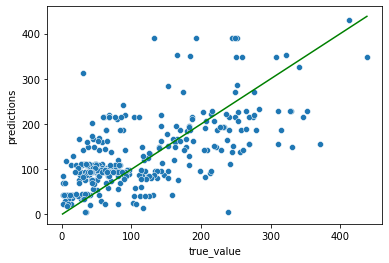

In [61]:
# define model
gb = DecisionTreeRegressor(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'max_depth': [2, 4, 10, 15, 20, 25, 30, 35],
    'min_samples_split' : [2,3,4,5,6,7,8]
}

# define grid search
grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(X_train, y_train)

# get best estimator
best = grid_search.best_estimator_
preditions_best = best.predict(X_test)
print('MSE:',(np.square(preditions_best - y_test)).mean()**0.5)
show_regresion_error(preditions_best, y_test)

### RandomForestRegressor

### we will check some random forest parameters values

#### "scratch grid search"

MSE: 60.590553711248404


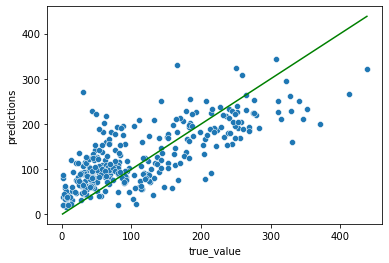

In [62]:
# hyperparametrs:
min_samples_split = [2,3,4]
min_samples_leaf = [2,4,6]
n_estimators = [80,100,120]
best_esti = []
# finding the best estimator
for idx in range(3):
    for jdx in range(3):
        for kdx in range(3):
            Forestregressor = RandomForestRegressor(n_estimators = n_estimators[idx], random_state = 10,
                                      min_samples_leaf=min_samples_leaf[jdx], min_samples_split = min_samples_split[kdx])

            Forestregressor.fit(X_train, y_train)
            forestP = Forestregressor.predict(X_test)
            MSE_For = np.square(forestP  - y_test).mean()**0.5
            best_esti.append((Forestregressor, MSE_For))
#getting the best estimator
best_randomForest = None
min_mse = 99999.0
for itm in best_esti:
    if(itm[1] < min_mse):
        best_randomForest, min_mse = itm[0],itm[1]
# printing the mean squared error of that estimator
print('MSE:',(np.square(best_randomForest.predict(X_test) - y_test)).mean()**0.5)
show_regresion_error(best_randomForest.predict(X_test), y_test)   

###  GradientBoostingRegressor 

#### GridSearchCV by me

MSE: 66.43382488524254


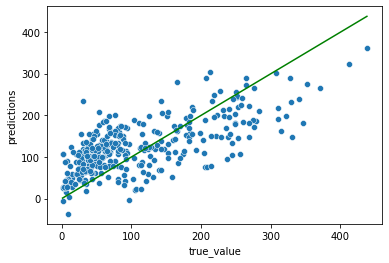

In [63]:
# hyperparametrs:
learning_rate = [0.1, 0.2, 0.3, 0.4]
n_estimators = [80, 100, 120, 140]
best_esti = []
# finding the best estimator
for i in range(len(learning_rate)):
    learningRate = learning_rate[i]
    for j in range(len(n_estimators)):
        gradBoost =GradientBoostingRegressor(random_state=10, n_estimators = n_estimators[j], learning_rate =learningRate)
        gradBoost.fit(X_train, y_train)
        p = gradBoost.predict(X_test)
        MSE = np.square(p  - y_test).mean()**0.5
        best_esti.append((gradBoost, MSE))
#getting the best estimator
best_gradBoost = None
min_mse = 99999.0
for itm in best_esti:
    if(itm[1] < min_mse):
        best_gradBoost, min_mse = itm[0],itm[1]


# printing the mean squared error of that estimator        
print('MSE:',(np.square(best_gradBoost.predict(X_test) - y_test)).mean()**0.5)
show_regresion_error(best_gradBoost.predict(X_test), y_test)   

    
    

### קצת על מודלים של הרגרסיה

#### כמו שניתן לראות שהחיזוי במודל של עץ החלטה רגרסי נתן הכי הרבה טעויות לפי מדד ה
#### MSE
#### והמודלים האחרים שמבוססי לימוד חלש נתנו ביצועין יותר טובים לפי המדד 
#### כל מודל יש לו את שיטת הלימוד שלו ובסוף הטעות הייתה נעה בין 60 ל 72
#### אבל בפה אחד אפשר להגיד שתנאי מזג האוויר משפיעים על המכירות לפי המודלים


# Back to Section B

In [64]:
sectionB

station_nbr  tmax  tmin  tavg  dewpoint  wetbulb  heat  cool  \
0                  1  52.0  31.0  42.0      36.0     40.0  23.0   0.0   
1                  1  52.0  31.0  42.0      36.0     40.0  23.0   0.0   
2                  1  52.0  31.0  42.0      36.0     40.0  23.0   0.0   
3                  1  52.0  31.0  42.0      36.0     40.0  23.0   0.0   
4                  1  52.0  31.0  42.0      36.0     40.0  23.0   0.0   
...              ...   ...   ...   ...       ...      ...   ...   ...   
4617595           20  68.0  50.0  59.0      39.0     50.0   6.0   0.0   
4617596           20  68.0  50.0  59.0      39.0     50.0   6.0   0.0   
4617597           20  68.0  50.0  59.0      39.0     50.0   6.0   0.0   
4617598           20  68.0  50.0  59.0      39.0     50.0   6.0   0.0   
4617599           20  68.0  50.0  59.0      39.0     50.0   6.0   0.0   

         snowfall  preciptotal  ...   day    year  weekend       date  rained  \
0        0.129276         0.05  ...   1.0  2012.0      1.0 2012-01-01       1   
1        0.129276         0.05  ...   1.0  2012.0      1.0 2012-01-01       1   
2        0.129276         0.05  ...   1.0  2012.0      1.0 2012-01-01       1   
3        0.129276         0.05  ...   1.0  2012.0      1.0 2012-01-01       1   
4        0.129276         0.05  ...   1.0  2012.0      1.0 2012-01-01       1   
...           ...          ...  ...   ...     ...      ...        ...     ...   
4617595  0.000000         0.00  ...  31.0  2014.0      0.0 2014-10-31       0   
4617596  0.000000         0.00  ...  31.0  2014.0      0.0 2014-10-31       0   
4617597  0.000000         0.00  ...  31.0  2014.0      0.0 2014-10-31       0   
4617598  0.000000         0.00  ...  31.0  2014.0      0.0 2014-10-31       0   
4617599  0.000000         0.00  ...  31.0  2014.0      0.0 2014-10-31       0   

         weatherSc  holiday  store_nbr  item_nbr  units  
0                2        1          1         1      0  
1                2        1          1         2      0  
2                2        1          1         3      0  
3                2        1          1         4      0  
4                2        1          1         5      0  
...            ...      ...        ...       ...    ...  
4617595          1        1         17       107      0  
4617596          1        1         17       108      0  
4617597          1        1         17       109      0  
4617598          1        1         17       110      0  
4617599          1        1         17       111      0  

[4617600 rows x 27 columns]

In [65]:
sectionD = sectionB[sectionB['store_nbr'] == 11] # looking only for store number 11
sectionD

station_nbr  tmax  tmin  tavg  dewpoint  wetbulb  heat  cool  \
1554              10  73.0  53.0  63.0      55.0     58.0   2.0   0.0   
1555              10  73.0  53.0  63.0      55.0     58.0   2.0   0.0   
1556              10  73.0  53.0  63.0      55.0     58.0   2.0   0.0   
1557              10  73.0  53.0  63.0      55.0     58.0   2.0   0.0   
1558              10  73.0  53.0  63.0      55.0     58.0   2.0   0.0   
...              ...   ...   ...   ...       ...      ...   ...   ...   
4614376           10  77.0  63.0  70.0      51.0     59.0   0.0   5.0   
4614377           10  77.0  63.0  70.0      51.0     59.0   0.0   5.0   
4614378           10  77.0  63.0  70.0      51.0     59.0   0.0   5.0   
4614379           10  77.0  63.0  70.0      51.0     59.0   0.0   5.0   
4614380           10  77.0  63.0  70.0      51.0     59.0   0.0   5.0   

         snowfall  preciptotal  ...   day    year  weekend       date  rained  \
1554          0.0          0.0  ...   1.0  2012.0      1.0 2012-01-01       0   
1555          0.0          0.0  ...   1.0  2012.0      1.0 2012-01-01       0   
1556          0.0          0.0  ...   1.0  2012.0      1.0 2012-01-01       0   
1557          0.0          0.0  ...   1.0  2012.0      1.0 2012-01-01       0   
1558          0.0          0.0  ...   1.0  2012.0      1.0 2012-01-01       0   
...           ...          ...  ...   ...     ...      ...        ...     ...   
4614376       0.0          0.0  ...  31.0  2014.0      0.0 2014-10-31       0   
4614377       0.0          0.0  ...  31.0  2014.0      0.0 2014-10-31       0   
4614378       0.0          0.0  ...  31.0  2014.0      0.0 2014-10-31       0   
4614379       0.0          0.0  ...  31.0  2014.0      0.0 2014-10-31       0   
4614380       0.0          0.0  ...  31.0  2014.0      0.0 2014-10-31       0   

         weatherSc  holiday  store_nbr  item_nbr  units  
1554             3        1         11         1      0  
1555             3        1         11         2      0  
1556             3        1         11         3      0  
1557             3        1         11         4      0  
1558             3        1         11         5      0  
...            ...      ...        ...       ...    ...  
4614376          1        1         11       107      0  
4614377          1        1         11       108      0  
4614378          1        1         11       109      0  
4614379          1        1         11       110     14  
4614380          1        1         11       111      0  

[99678 rows x 27 columns]

In [66]:
sectionStr11 = sectionD[['day','year','month', 'rained', 'units', 'item_nbr', 'date', 'holiday', 'weekend']] # choosing the relevant features
sectionStr11

day    year  month  rained  units  item_nbr       date  holiday  \
1554      1.0  2012.0    1.0       0      0         1 2012-01-01        1   
1555      1.0  2012.0    1.0       0      0         2 2012-01-01        1   
1556      1.0  2012.0    1.0       0      0         3 2012-01-01        1   
1557      1.0  2012.0    1.0       0      0         4 2012-01-01        1   
1558      1.0  2012.0    1.0       0      0         5 2012-01-01        1   
...       ...     ...    ...     ...    ...       ...        ...      ...   
4614376  31.0  2014.0   10.0       0      0       107 2014-10-31        1   
4614377  31.0  2014.0   10.0       0      0       108 2014-10-31        1   
4614378  31.0  2014.0   10.0       0      0       109 2014-10-31        1   
4614379  31.0  2014.0   10.0       0     14       110 2014-10-31        1   
4614380  31.0  2014.0   10.0       0      0       111 2014-10-31        1   

         weekend  
1554         1.0  
1555         1.0  
1556         1.0  
1557         1.0  
1558         1.0  
...          ...  
4614376      0.0  
4614377      0.0  
4614378      0.0  
4614379      0.0  
4614380      0.0  

[99678 rows x 9 columns]

#### we will give a grade to each month(in each year) that the more is greater the more that we could see a rain in this month is bigger , maybe this information will help our models to predict better

In [67]:
dataF_2012 = pd.DataFrame()
for i in range(1,13):
    dic={}
    x = len(sectionStr11[(sectionStr11['rained'] != 0) & (sectionStr11['month'] == i) & (sectionStr11['year'] == 2012)])
    if i in [1, 3, 5, 7, 8, 10 ,12]:
        avg_rain_1 = x/ (31)
    
    elif i in [4,6,9,11]:
        avg_rain_1 = x/ (30)
    
    else:
        avg_rain_1 = x / (28)
    dic['month'] = float(i)
    dic['year'] = 2012.0
    dic['Probability_for_rain'] = avg_rain_1
    dataF_2012 = dataF_2012.append(dic, ignore_index=True)
dataF_2012

month    year  Probability_for_rain
0     1.0  2012.0             25.064516
1     2.0  2012.0             63.428571
2     3.0  2012.0             42.967742
3     4.0  2012.0             44.400000
4     5.0  2012.0             64.451613
5     6.0  2012.0             70.300000
6     7.0  2012.0             71.612903
7     8.0  2012.0             85.935484
8     9.0  2012.0             66.600000
9    10.0  2012.0             39.387097
10   11.0  2012.0             29.600000
11   12.0  2012.0             46.548387

In [68]:
dataF_2013 = pd.DataFrame()
for i in range(1,13):
    dic={}
    x = len(sectionStr11[(sectionStr11['rained'] != 0) & (sectionStr11['month'] == i) & (sectionStr11['year'] == 2013)])
    if i in [1, 3, 5, 7, 8, 10 ,12]:
        avg_rain_2 = x/ (31)
    
    elif i in [4,6,9,11]:
        avg_rain_2 = x/ (30)
    
    else:
        avg_rain_2 = x / (28)
    dic['month'] = float(i)
    dic['year'] = 2013.0
    dic['Probability_for_rain'] = avg_rain_2
    dataF_2013 = dataF_2013.append(dic, ignore_index=True)
dataF_2013

month    year  Probability_for_rain
0     1.0  2013.0             60.870968
1     2.0  2013.0             51.535714
2     3.0  2013.0             35.806452
3     4.0  2013.0             37.000000
4     5.0  2013.0             32.225806
5     6.0  2013.0             37.000000
6     7.0  2013.0             35.806452
7     8.0  2013.0             68.032258
8     9.0  2013.0             55.500000
9    10.0  2013.0             39.387097
10   11.0  2013.0             33.300000
11   12.0  2013.0             35.806452

In [69]:
dataF_2014 = pd.DataFrame()
for i in range(1,13):
    dic={}
    x = len(sectionStr11[(sectionStr11['rained'] != 0) & (sectionStr11['month'] == i) & (sectionStr11['year'] == 2014)])
    if i in [1, 3, 5, 7, 8, 10 ,12]:
        avg_rain_2 = x/ (31)
    
    elif i in [4,6,9,11]:
        avg_rain_2 = x/ (30)
    
    else:
        avg_rain_2 = x / (28)
    dic['month'] = float(i)
    dic['year'] = 2014.0
    dic['Probability_for_rain'] = avg_rain_2
    dataF_2014 = dataF_2014.append(dic, ignore_index=True)
dataF_2014

month    year  Probability_for_rain
0     1.0  2014.0             50.129032
1     2.0  2014.0             47.571429
2     3.0  2014.0             17.903226
3     4.0  2014.0             44.400000
4     5.0  2014.0             42.967742
5     6.0  2014.0             70.300000
6     7.0  2014.0             46.548387
7     8.0  2014.0             75.193548
8     9.0  2014.0             33.300000
9    10.0  2014.0             21.483871
10   11.0  2014.0              0.000000
11   12.0  2014.0              0.000000

#### let's merge the reslut to our dataset

In [70]:
t1 = pd.concat([dataF_2012, dataF_2013])
t2 = pd.concat([t1, dataF_2014])
t2

month    year  Probability_for_rain
0     1.0  2012.0             25.064516
1     2.0  2012.0             63.428571
2     3.0  2012.0             42.967742
3     4.0  2012.0             44.400000
4     5.0  2012.0             64.451613
5     6.0  2012.0             70.300000
6     7.0  2012.0             71.612903
7     8.0  2012.0             85.935484
8     9.0  2012.0             66.600000
9    10.0  2012.0             39.387097
10   11.0  2012.0             29.600000
11   12.0  2012.0             46.548387
0     1.0  2013.0             60.870968
1     2.0  2013.0             51.535714
2     3.0  2013.0             35.806452
3     4.0  2013.0             37.000000
4     5.0  2013.0             32.225806
5     6.0  2013.0             37.000000
6     7.0  2013.0             35.806452
7     8.0  2013.0             68.032258
8     9.0  2013.0             55.500000
9    10.0  2013.0             39.387097
10   11.0  2013.0             33.300000
11   12.0  2013.0             35.806452
0     1.0  2014.0             50.129032
1     2.0  2014.0             47.571429
2     3.0  2014.0             17.903226
3     4.0  2014.0             44.400000
4     5.0  2014.0             42.967742
5     6.0  2014.0             70.300000
6     7.0  2014.0             46.548387
7     8.0  2014.0             75.193548
8     9.0  2014.0             33.300000
9    10.0  2014.0             21.483871
10   11.0  2014.0              0.000000
11   12.0  2014.0              0.000000

In [71]:
merged = pd.merge(right=sectionStr11, left=t2, how='inner', on=['month', 'year']) # merging
merged

month    year  Probability_for_rain   day  rained  units  item_nbr  \
0        1.0  2012.0             25.064516   1.0       0      0         1   
1        1.0  2012.0             25.064516   1.0       0      0         2   
2        1.0  2012.0             25.064516   1.0       0      0         3   
3        1.0  2012.0             25.064516   1.0       0      0         4   
4        1.0  2012.0             25.064516   1.0       0      0         5   
...      ...     ...                   ...   ...     ...    ...       ...   
99673   10.0  2014.0             21.483871  31.0       0      0       107   
99674   10.0  2014.0             21.483871  31.0       0      0       108   
99675   10.0  2014.0             21.483871  31.0       0      0       109   
99676   10.0  2014.0             21.483871  31.0       0     14       110   
99677   10.0  2014.0             21.483871  31.0       0      0       111   

            date  holiday  weekend  
0     2012-01-01        1      1.0  
1     2012-01-01        1      1.0  
2     2012-01-01        1      1.0  
3     2012-01-01        1      1.0  
4     2012-01-01        1      1.0  
...          ...      ...      ...  
99673 2014-10-31        1      0.0  
99674 2014-10-31        1      0.0  
99675 2014-10-31        1      0.0  
99676 2014-10-31        1      0.0  
99677 2014-10-31        1      0.0  

[99678 rows x 10 columns]

#### as you can see i wanna send to my model only the days that there was a sales for units may help the model know if there a item that sailed a lot in rainy day or not

In [72]:
merged = merged[merged['units'] > 0] 
merged

month    year  Probability_for_rain   day  rained  units  item_nbr  \
8        1.0  2012.0             25.064516   1.0       0     74         9   
67       1.0  2012.0             25.064516   1.0       0     48        68   
119      1.0  2012.0             25.064516   2.0       0     49         9   
178      1.0  2012.0             25.064516   2.0       0     71        68   
230      1.0  2012.0             25.064516   3.0       1     42         9   
...      ...     ...                   ...   ...     ...    ...       ...   
99565   10.0  2014.0             21.483871  30.0       1     13       110   
99575   10.0  2014.0             21.483871  31.0       0      4         9   
99634   10.0  2014.0             21.483871  31.0       0     20        68   
99653   10.0  2014.0             21.483871  31.0       0      3        87   
99676   10.0  2014.0             21.483871  31.0       0     14       110   

            date  holiday  weekend  
8     2012-01-01        1      1.0  
67    2012-01-01        1      1.0  
119   2012-01-02        0      0.0  
178   2012-01-02        0      0.0  
230   2012-01-03        0      0.0  
...          ...      ...      ...  
99565 2014-10-30        0      0.0  
99575 2014-10-31        1      0.0  
99634 2014-10-31        1      0.0  
99653 2014-10-31        1      0.0  
99676 2014-10-31        1      0.0  

[2705 rows x 10 columns]

#### the weekend and holiday may  help our model know if the rain or the holiday or the weekend affected our sales for each unit

# Section D : rainy day prediction <a class="anchor" id="section5"></a>

### (classifaction problem!)

In [73]:
X = merged[merged['year'] <= 2013] 
X

month    year  Probability_for_rain   day  rained  units  item_nbr  \
8        1.0  2012.0             25.064516   1.0       0     74         9   
67       1.0  2012.0             25.064516   1.0       0     48        68   
119      1.0  2012.0             25.064516   2.0       0     49         9   
178      1.0  2012.0             25.064516   2.0       0     71        68   
230      1.0  2012.0             25.064516   3.0       1     42         9   
...      ...     ...                   ...   ...     ...    ...       ...   
71792   12.0  2013.0             35.806452  23.0       1      3        87   
71825   12.0  2013.0             35.806452  24.0       1     56         9   
71884   12.0  2013.0             35.806452  24.0       1     35        68   
71903   12.0  2013.0             35.806452  24.0       1      3        87   
71936   12.0  2013.0             35.806452  25.0       0      1         9   

            date  holiday  weekend  
8     2012-01-01        1      1.0  
67    2012-01-01        1      1.0  
119   2012-01-02        0      0.0  
178   2012-01-02        0      0.0  
230   2012-01-03        0      0.0  
...          ...      ...      ...  
71792 2013-12-23        0      0.0  
71825 2013-12-24        0      0.0  
71884 2013-12-24        0      0.0  
71903 2013-12-24        0      0.0  
71936 2013-12-25        1      0.0  

[1859 rows x 10 columns]

In [74]:
y = merged[merged['year'] > 2013] 
y

month    year  Probability_for_rain   day  rained  units  item_nbr  \
72047    1.0  2014.0             50.129032   6.0       1     43         9   
72099    1.0  2014.0             50.129032   6.0       1      1        61   
72106    1.0  2014.0             50.129032   6.0       1     25        68   
72125    1.0  2014.0             50.129032   6.0       1      1        87   
72158    1.0  2014.0             50.129032   7.0       0      8         9   
...      ...     ...                   ...   ...     ...    ...       ...   
99565   10.0  2014.0             21.483871  30.0       1     13       110   
99575   10.0  2014.0             21.483871  31.0       0      4         9   
99634   10.0  2014.0             21.483871  31.0       0     20        68   
99653   10.0  2014.0             21.483871  31.0       0      3        87   
99676   10.0  2014.0             21.483871  31.0       0     14       110   

            date  holiday  weekend  
72047 2014-01-06        0      0.0  
72099 2014-01-06        0      0.0  
72106 2014-01-06        0      0.0  
72125 2014-01-06        0      0.0  
72158 2014-01-07        0      0.0  
...          ...      ...      ...  
99565 2014-10-30        0      0.0  
99575 2014-10-31        1      0.0  
99634 2014-10-31        1      0.0  
99653 2014-10-31        1      0.0  
99676 2014-10-31        1      0.0  

[846 rows x 10 columns]

In [75]:
X_train_D = X.drop(['rained', 'date'], axis=1)
y_train_D = X['rained']
X_test_D = y.drop(['rained','date'], axis=1)
y_test_D = y['rained']

### RandomForestclassfier to predict if it rained in a given day


In [76]:
# define model
gb = RandomForestClassifier(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [8,9, 10, 11,12],
    'min_samples_split' : [2,3,4]
}

# define grid search
grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(X_train_D,y_train_D)

# get best estimator
best_randomForest_cls = grid_search.best_estimator_
preditions_best = best_randomForest_cls.predict(X_test_D)
print(confusion_matrix(y_test_D, preditions_best))
print(classification_report(y_test_D, preditions_best))

[[272 157]
 [167 250]]
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       429
           1       0.61      0.60      0.61       417

    accuracy                           0.62       846
   macro avg       0.62      0.62      0.62       846
weighted avg       0.62      0.62      0.62       846



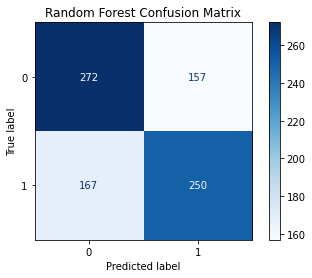

In [77]:
# plot confusion metrics
plot_confusion_matrix(best_randomForest_cls, X_test_D, y_test_D, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

### AdaBoost to predict if it rained in a given day


In [78]:
# define model
gb = AdaBoostClassifier(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'learning_rate': [0.7, 0.8, 0.9,1.0, 1.1],
    'n_estimators' : [10, 11,12, 13,14,15],
    'algorithm' : ['SAMME', 'SAMME.R']
}

# define grid search
grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(X_train_D,y_train_D)

# get best estimator
best_tree_ada = grid_search.best_estimator_
preditions_best = best_tree_ada.predict(X_test_D)
print(confusion_matrix(y_test_D, preditions_best))
print(classification_report(y_test_D, preditions_best))

[[329 100]
 [247 170]]
              precision    recall  f1-score   support

           0       0.57      0.77      0.65       429
           1       0.63      0.41      0.49       417

    accuracy                           0.59       846
   macro avg       0.60      0.59      0.57       846
weighted avg       0.60      0.59      0.58       846



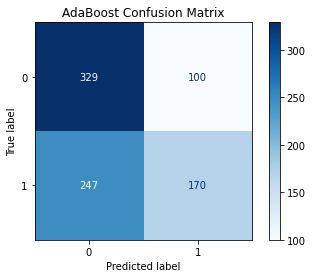

In [79]:
# plot confusion metrics
plot_confusion_matrix(best_tree_ada, X_test_D, y_test_D, cmap='Blues')
plt.title("AdaBoost Confusion Matrix")
plt.show()

### GradientBoostingClassifier to predict if it rained in a given day


In [80]:
# define model
gb = GradientBoostingClassifier(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'loss': ['log_loss', 'deviance', 'exponential'],
    'learning_rate': [0.6, 0.7, 0.8, 0.9],
    'n_estimators' : [10, 11,12, 13],
    'criterion': ['friedman_mse', 'squared_error', 'mse']
}

# define grid search
grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(X_train_D,y_train_D)

# get best estimator
best_grad = grid_search.best_estimator_
preditions_best = best_grad.predict(X_test_D)
print(confusion_matrix(y_test_D, preditions_best))
print(classification_report(y_test_D, preditions_best))

[[276 153]
 [182 235]]
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       429
           1       0.61      0.56      0.58       417

    accuracy                           0.60       846
   macro avg       0.60      0.60      0.60       846
weighted avg       0.60      0.60      0.60       846



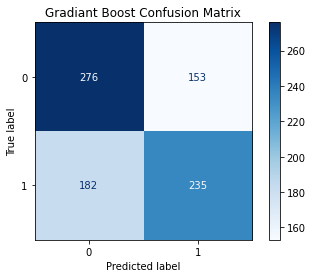

In [81]:
# plot confusion metrics
plot_confusion_matrix(best_grad, X_test_D, y_test_D, cmap='Blues')
plt.title("Gradiant Boost Confusion Matrix")
plt.show()

### קצת על המודלים של החיזוי
#### ניתן לראות שבשלושת המודלים היה חיזוי גבוה יותר לכך שהיה ימים יבשים יותר מימים גשומים אבל כל מודל טעה במידה מסוימת כך למשל ש 
#### adaboost
#### היה לו את הדיוק הכי פחות ואופי הלמידה שלו גרם לו לחזות ב 0.65 אחוזים שהיה ימים יבשים 
#### שאר שני המודלים חזו יותר שהיה ימים יבשים אבל פחות מ אדא בוסט
#### יש לשים לב שכל מודל יש לו את צורת הלימוד שלו והפרמטרים שלו לכן הטעויות בכל מודל והדיוק שונה אבל בסוף אפשר לקבוע לפי שלושתם שבתחנה 11 היו ימים יבשים יותר מימים גושמים

#### by the macro avg and the weighted avg and accuracy we can see that the best model is RandomForest calssifier

# Section F : Clustering - bonus  <a class="anchor" id="section6"></a>

#### in this section i'm going to cluster the station which station that look smiliar will be in the same cluster

In [82]:
section_f

station_nbr  tmax  tmin  tavg  dewpoint  wetbulb  heat  cool  snowfall  \
0              1.0  52.0  31.0  42.0      36.0     40.0  23.0   0.0  0.129276   
1              2.0  48.0  33.0  41.0      37.0     39.0  24.0   0.0  0.000000   
2              3.0  55.0  34.0  45.0      24.0     36.0  20.0   0.0  0.000000   
3              4.0  63.0  47.0  55.0      28.0     43.0  10.0   0.0  0.000000   
4              6.0  63.0  34.0  49.0      31.0     43.0  16.0   0.0  0.000000   
...            ...   ...   ...   ...       ...      ...   ...   ...       ...   
20512         16.0  53.0  34.0  44.0      35.0     41.0  21.0   0.0  0.000000   
20513         17.0  59.0  34.0  47.0      32.0     41.0  18.0   0.0  0.000000   
20514         18.0  67.0  49.0  58.0      40.0     50.0   7.0   0.0  0.000000   
20515         19.0  45.0  33.0  39.0      24.0     32.0  26.0   0.0  0.100000   
20516         20.0  68.0  50.0  59.0      39.0     50.0   6.0   0.0  0.000000   

       preciptotal  ...  sealevel  resultspeed  resultdir  avgspeed  week  \
0             0.05  ...     29.92          3.6       20.0       4.6  52.0   
1             0.07  ...     29.91          9.1       23.0      11.3  52.0   
2             0.00  ...     30.47          9.9       31.0      10.0  52.0   
3             0.00  ...     30.48          8.0       35.0       8.2  52.0   
4             0.00  ...     30.47         14.0       36.0      13.8  52.0   
...            ...  ...       ...          ...        ...       ...   ...   
20512         0.00  ...     29.99          4.5        3.0       5.3  44.0   
20513         0.00  ...     30.39          9.2        1.0       9.3  44.0   
20514         0.00  ...     30.28         10.6       36.0      11.2  44.0   
20515         0.02  ...     30.24         20.4       34.0      20.9  44.0   
20516         0.00  ...     30.27         10.5       36.0      11.2  44.0   

       weekday  month   day    year  weekend  
0          6.0    1.0   1.0  2012.0      1.0  
1          6.0    1.0   1.0  2012.0      1.0  
2          6.0    1.0   1.0  2012.0      1.0  
3          6.0    1.0   1.0  2012.0      1.0  
4          6.0    1.0   1.0  2012.0      1.0  
...        ...    ...   ...     ...      ...  
20512      4.0   10.0  31.0  2014.0      0.0  
20513      4.0   10.0  31.0  2014.0      0.0  
20514      4.0   10.0  31.0  2014.0      0.0  
20515      4.0   10.0  31.0  2014.0      0.0  
20516      4.0   10.0  31.0  2014.0      0.0  

[20517 rows x 21 columns]

#### first off all i wanna implement the elbow method to help choose the k value for the k means

In [83]:
def findOptimalK(dataset):
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(dataset)
        kmeanModel.fit(dataset)
        distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dataset.shape[0])

    # Plot the elbow
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

####  אני יעשה אגרגרציה שתתבסס על הסכום לפי מספרי תחנות יש לשים לב שאם נסכום תמפיות ההתפלגות תשאר אותה התפלגות לכן לגטימי לסכום כלומר אם שני משתנים יהיו שייכים לאותו אשכול לפני הסכימה הם ישארו שייכים לאותו אשכול גם אחרי הסכימה

#### i will take this subset 	(station_nbr,	tmax,	tmin,	tavg,	dewpoint,	wetbulb) from the weather dataset for this section
#### these variables in the subset have the most corraltion between them

In [84]:
cols_c = ['station_nbr','tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb']
cols_cluster = section_f[cols_c]
g_cluster = cols_cluster.groupby('station_nbr').sum().reset_index()
g_cluster

station_nbr          tmax          tmin          tavg      dewpoint  \
0           1.0  63634.868997  44058.286914  54107.476276  40311.186797   
1           2.0  59827.231767  42911.583726  51650.162490  39722.227688   
2           3.0  76192.214004  52910.538724  64812.097614  49608.000000   
3           4.0  85108.901699  62100.881173  73856.679798  57083.906277   
4           5.0  62715.724256  44243.409231  53420.361263  39103.706511   
5           6.0  84501.400279  58353.001506  71668.922172  58182.000000   
6           7.0  76324.534091  53474.114424  65134.080023  48110.947243   
7           8.0  84502.952650  62558.327867  73684.442497  60753.910061   
8           9.0  58605.376337  39648.266431  49372.994558  37664.227124   
9          10.0  84020.000000  66874.000000  75704.744475  62291.000000   
10         11.0  82734.685809  61002.018604  72127.078698  62261.854045   
11         12.0  83197.055964  63934.893239  73831.560110  62407.501708   
12         13.0  67518.192874  39127.125169  53568.542403  29882.000000   
13         14.0  76812.638219  52973.918804  65178.605021  48663.391719   
14         15.0  61595.100774  37563.951023  49833.119818  38917.309893   
15         16.0  62524.949852  42925.715380  52981.322228  41308.594870   
16         17.0  77110.589621  51910.506542  64753.495621  49386.360616   
17         18.0  82174.107927  60961.118407  71832.843924  53417.000000   
18         19.0  59131.299623  42234.278107  50950.521898  39760.002931   
19         20.0  82102.646873  59626.405351  71128.580669  53682.442943   

         wetbulb  
0   47763.885089  
1   46077.499520  
2   56563.070337  
3   63713.482940  
4   46435.264782  
5   63571.439963  
6   55824.295965  
7   65839.889988  
8   43813.356951  
9   67292.874856  
10  65834.886272  
11  66739.419060  
12  42305.267673  
13  56002.267146  
14  44971.499215  
15  47737.209040  
16  56379.382952  
17  61178.906142  
18  45594.237913  
19  61036.304272

#### let's find the optimal k by the elbow function

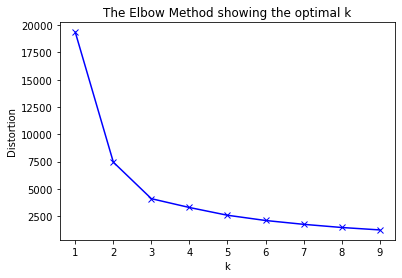

In [85]:
findOptimalK(g_cluster)

#### we will choose k to be 3 (the elbow value)

In [86]:
tryMe_km = g_cluster.drop(['station_nbr'], axis=1).copy()
tryMe_km

tmax          tmin          tavg      dewpoint       wetbulb
0   63634.868997  44058.286914  54107.476276  40311.186797  47763.885089
1   59827.231767  42911.583726  51650.162490  39722.227688  46077.499520
2   76192.214004  52910.538724  64812.097614  49608.000000  56563.070337
3   85108.901699  62100.881173  73856.679798  57083.906277  63713.482940
4   62715.724256  44243.409231  53420.361263  39103.706511  46435.264782
5   84501.400279  58353.001506  71668.922172  58182.000000  63571.439963
6   76324.534091  53474.114424  65134.080023  48110.947243  55824.295965
7   84502.952650  62558.327867  73684.442497  60753.910061  65839.889988
8   58605.376337  39648.266431  49372.994558  37664.227124  43813.356951
9   84020.000000  66874.000000  75704.744475  62291.000000  67292.874856
10  82734.685809  61002.018604  72127.078698  62261.854045  65834.886272
11  83197.055964  63934.893239  73831.560110  62407.501708  66739.419060
12  67518.192874  39127.125169  53568.542403  29882.000000  42305.267673
13  76812.638219  52973.918804  65178.605021  48663.391719  56002.267146
14  61595.100774  37563.951023  49833.119818  38917.309893  44971.499215
15  62524.949852  42925.715380  52981.322228  41308.594870  47737.209040
16  77110.589621  51910.506542  64753.495621  49386.360616  56379.382952
17  82174.107927  60961.118407  71832.843924  53417.000000  61178.906142
18  59131.299623  42234.278107  50950.521898  39760.002931  45594.237913
19  82102.646873  59626.405351  71128.580669  53682.442943  61036.304272

In [87]:
# define model
k_means = KMeans(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'n_clusters': [3],
    'init': ['k-means++', 'random'],
    'n_init' : [3,5,8,10],
    'max_iter' : [100, 150, 200]
}

# define grid search
grid_search = GridSearchCV(estimator=k_means, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(tryMe_km)

# get best estimator
best_km = grid_search.best_estimator_
preditions_best_km = best_km.predict(tryMe_km)
preditions_best_km

array([1, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0])

In [88]:
tryMe_km['cluster'] = preditions_best_km
tryMe_km

tmax          tmin          tavg      dewpoint       wetbulb  \
0   63634.868997  44058.286914  54107.476276  40311.186797  47763.885089   
1   59827.231767  42911.583726  51650.162490  39722.227688  46077.499520   
2   76192.214004  52910.538724  64812.097614  49608.000000  56563.070337   
3   85108.901699  62100.881173  73856.679798  57083.906277  63713.482940   
4   62715.724256  44243.409231  53420.361263  39103.706511  46435.264782   
5   84501.400279  58353.001506  71668.922172  58182.000000  63571.439963   
6   76324.534091  53474.114424  65134.080023  48110.947243  55824.295965   
7   84502.952650  62558.327867  73684.442497  60753.910061  65839.889988   
8   58605.376337  39648.266431  49372.994558  37664.227124  43813.356951   
9   84020.000000  66874.000000  75704.744475  62291.000000  67292.874856   
10  82734.685809  61002.018604  72127.078698  62261.854045  65834.886272   
11  83197.055964  63934.893239  73831.560110  62407.501708  66739.419060   
12  67518.192874  39127.125169  53568.542403  29882.000000  42305.267673   
13  76812.638219  52973.918804  65178.605021  48663.391719  56002.267146   
14  61595.100774  37563.951023  49833.119818  38917.309893  44971.499215   
15  62524.949852  42925.715380  52981.322228  41308.594870  47737.209040   
16  77110.589621  51910.506542  64753.495621  49386.360616  56379.382952   
17  82174.107927  60961.118407  71832.843924  53417.000000  61178.906142   
18  59131.299623  42234.278107  50950.521898  39760.002931  45594.237913   
19  82102.646873  59626.405351  71128.580669  53682.442943  61036.304272   

    cluster  
0         1  
1         1  
2         2  
3         0  
4         1  
5         0  
6         2  
7         0  
8         1  
9         0  
10        0  
11        0  
12        1  
13        2  
14        1  
15        1  
16        2  
17        0  
18        1  
19        0

#### let's see each cluster which stations contains

In [89]:
cluster = pd.DataFrame()
cluster_0 = {}
cluster_1 = {}
cluster_2 = {}

cluster_0['cluster_number'] = int(0)
cluster_0['stations'] = '3, 7, 14, 17'
cluster = cluster.append(cluster_0, ignore_index=True)

cluster_1['cluster_number'] = int(1)
cluster_1['stations'] = '1, 2, 5, 9, 13, 15, 16, 19'
cluster = cluster.append(cluster_1, ignore_index=True)

cluster_2['cluster_number'] = int(2)
cluster_2['stations'] = '4, 6, 8, 10, 11, 18, 20'
cluster = cluster.append(cluster_2, ignore_index=True)

cluster['cluster_number'] = cluster['cluster_number'].astype(int)

cluster_number                    stations
0               0                3, 7, 14, 17
1               1  1, 2, 5, 9, 13, 15, 16, 19
2               2     4, 6, 8, 10, 11, 18, 20

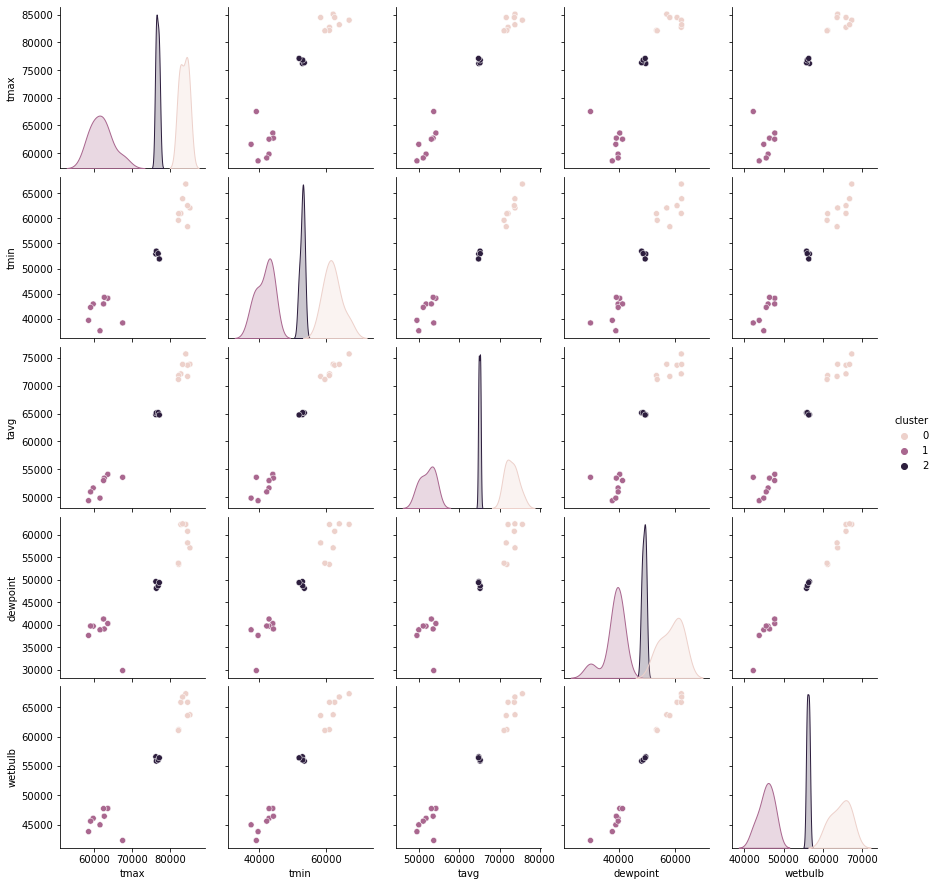

cluster_number                    stations
0               0                3, 7, 14, 17
1               1  1, 2, 5, 9, 13, 15, 16, 19
2               2     4, 6, 8, 10, 11, 18, 20

In [90]:
display(cluster)
sns.pairplot(tryMe_km, hue='cluster')
plt.show()
display(cluster)

### let's try the gaussian mixture model

In [91]:
tryMe_gmm = g_cluster.drop(['station_nbr'], axis=1).copy()
tryMe_gmm

tmax          tmin          tavg      dewpoint       wetbulb
0   63634.868997  44058.286914  54107.476276  40311.186797  47763.885089
1   59827.231767  42911.583726  51650.162490  39722.227688  46077.499520
2   76192.214004  52910.538724  64812.097614  49608.000000  56563.070337
3   85108.901699  62100.881173  73856.679798  57083.906277  63713.482940
4   62715.724256  44243.409231  53420.361263  39103.706511  46435.264782
5   84501.400279  58353.001506  71668.922172  58182.000000  63571.439963
6   76324.534091  53474.114424  65134.080023  48110.947243  55824.295965
7   84502.952650  62558.327867  73684.442497  60753.910061  65839.889988
8   58605.376337  39648.266431  49372.994558  37664.227124  43813.356951
9   84020.000000  66874.000000  75704.744475  62291.000000  67292.874856
10  82734.685809  61002.018604  72127.078698  62261.854045  65834.886272
11  83197.055964  63934.893239  73831.560110  62407.501708  66739.419060
12  67518.192874  39127.125169  53568.542403  29882.000000  42305.267673
13  76812.638219  52973.918804  65178.605021  48663.391719  56002.267146
14  61595.100774  37563.951023  49833.119818  38917.309893  44971.499215
15  62524.949852  42925.715380  52981.322228  41308.594870  47737.209040
16  77110.589621  51910.506542  64753.495621  49386.360616  56379.382952
17  82174.107927  60961.118407  71832.843924  53417.000000  61178.906142
18  59131.299623  42234.278107  50950.521898  39760.002931  45594.237913
19  82102.646873  59626.405351  71128.580669  53682.442943  61036.304272

In [92]:
gmm = GaussianMixture(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'n_components': [3],
    'init_params': ['kmeans', 'k-means++', 'random', 'random_from_data'],
    'n_init' : [1, 3, 5, 8, 10],
    'max_iter' : [100, 150, 200]
}

# define grid search
grid_search = GridSearchCV(estimator=gmm, param_grid=parameters_grid, cv=10)
# fit estimator
grid_search.fit(tryMe_gmm)

# get best estimator
best_gmm = grid_search.best_estimator_
preditions_best_gmm = best_km.predict(tryMe_gmm)
tryMe_gmm['cluster'] = preditions_best_gmm
tryMe_gmm

tmax          tmin          tavg      dewpoint       wetbulb  \
0   63634.868997  44058.286914  54107.476276  40311.186797  47763.885089   
1   59827.231767  42911.583726  51650.162490  39722.227688  46077.499520   
2   76192.214004  52910.538724  64812.097614  49608.000000  56563.070337   
3   85108.901699  62100.881173  73856.679798  57083.906277  63713.482940   
4   62715.724256  44243.409231  53420.361263  39103.706511  46435.264782   
5   84501.400279  58353.001506  71668.922172  58182.000000  63571.439963   
6   76324.534091  53474.114424  65134.080023  48110.947243  55824.295965   
7   84502.952650  62558.327867  73684.442497  60753.910061  65839.889988   
8   58605.376337  39648.266431  49372.994558  37664.227124  43813.356951   
9   84020.000000  66874.000000  75704.744475  62291.000000  67292.874856   
10  82734.685809  61002.018604  72127.078698  62261.854045  65834.886272   
11  83197.055964  63934.893239  73831.560110  62407.501708  66739.419060   
12  67518.192874  39127.125169  53568.542403  29882.000000  42305.267673   
13  76812.638219  52973.918804  65178.605021  48663.391719  56002.267146   
14  61595.100774  37563.951023  49833.119818  38917.309893  44971.499215   
15  62524.949852  42925.715380  52981.322228  41308.594870  47737.209040   
16  77110.589621  51910.506542  64753.495621  49386.360616  56379.382952   
17  82174.107927  60961.118407  71832.843924  53417.000000  61178.906142   
18  59131.299623  42234.278107  50950.521898  39760.002931  45594.237913   
19  82102.646873  59626.405351  71128.580669  53682.442943  61036.304272   

    cluster  
0         1  
1         1  
2         2  
3         0  
4         1  
5         0  
6         2  
7         0  
8         1  
9         0  
10        0  
11        0  
12        1  
13        2  
14        1  
15        1  
16        2  
17        0  
18        1  
19        0

In [93]:
cluster_gmm = pd.DataFrame()
cluster_0 = {}
cluster_1 = {}
cluster_2 = {}

cluster_0['cluster_number'] = int(0)
cluster_0['stations'] = '3, 7, 14, 17'
cluster_gmm = cluster_gmm.append(cluster_0, ignore_index=True)

cluster_1['cluster_number'] = int(1)
cluster_1['stations'] = '1, 2, 5, 9, 13, 15, 16, 19'
cluster_gmm = cluster_gmm.append(cluster_1, ignore_index=True)

cluster_2['cluster_number'] = int(2)
cluster_2['stations'] = '4, 6, 8, 10, 11, 18, 20'
cluster_gmm = cluster_gmm.append(cluster_2, ignore_index=True)

cluster_gmm['cluster_number'] = cluster_gmm['cluster_number'].astype(int)

cluster_number                    stations
0               0                3, 7, 14, 17
1               1  1, 2, 5, 9, 13, 15, 16, 19
2               2     4, 6, 8, 10, 11, 18, 20

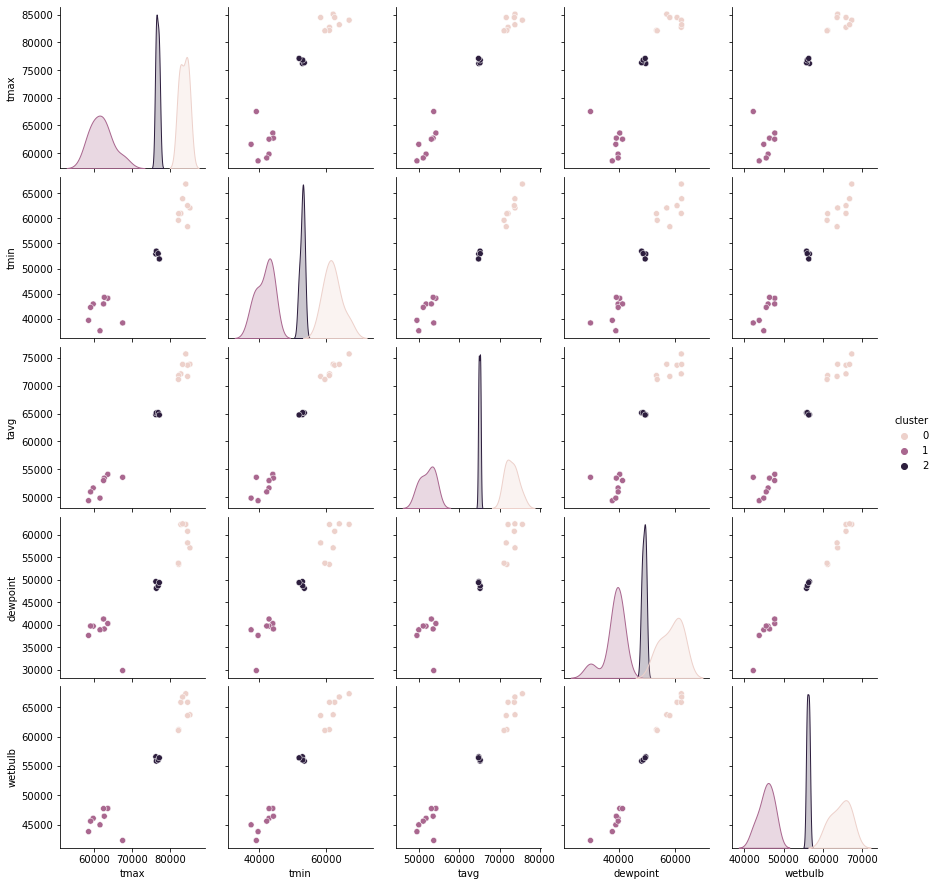

cluster_number                    stations
0               0                3, 7, 14, 17
1               1  1, 2, 5, 9, 13, 15, 16, 19
2               2     4, 6, 8, 10, 11, 18, 20

In [94]:
display(cluster_gmm)
sns.pairplot(tryMe_gmm, hue='cluster')
plt.show()
display(cluster_gmm)

#### מסקנות: לפי הגרפים השונים ופיזור הנקודות השונות ושיוך כל אחת מהתחנות לאשכול מסוים מעיד על כך שיש תחנות שהם במקומות מדבריים ויש אחרים במקומות שהם יותר קרים כלומר כל אשכול מעיד על מזג אוויר מסוג שונה שכל תחנה שנמצאת באשכול מסוים היא נמצאת בסוג של מזג אוויר למשל מדברי, שלגי וכו

#### ניתן להגיד שככל שתי תחנות קרובות באשכול מסוים ככל שהם חולקים סוג מזג אוויר דומה יותר וככל שהם רחוקים ככל שתנאי מזג האוויר שונה 